In [2]:
# importations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
df=pd.read_csv('Sample - Superstore.csv')
# encoding='utf-8'

df.head(2)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [3]:
# information about our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [65]:
# assign the columns to a new dataframe data
data=df[['Ship Mode','Segment', 'City','Sales','Quantity','Discount','Profit']]
data

,Ship Mode,Segment,City,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,29.6000,4,0.00,13.3200


In [5]:
# numerical description of the numerical data in the dataframr
data.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [6]:
# group by city to find te sum ,mean
data.groupby('City').Sales.agg(['sum','mean','min','max','count','median','std','var']).head()

,sum,mean,min,max,count,median,std,var
City,,,,,,,,
Aberdeen,25.500,25.500000,25.500,25.500,1,25.500,NaN,NaN
Abilene,1.392,1.392000,1.392,1.392,1,1.392,NaN,NaN
Akron,2729.986,129.999333,2.286,665.408,21,25.560,168.318749,2.833120e+04
Albuquerque,2220.160,158.582857,4.280,595.000,14,104.525,161.967111,2.623335e+04
Alexandria,5519.570,344.973125,12.420,4164.050,16,27.025,1025.875022,1.052420e+06


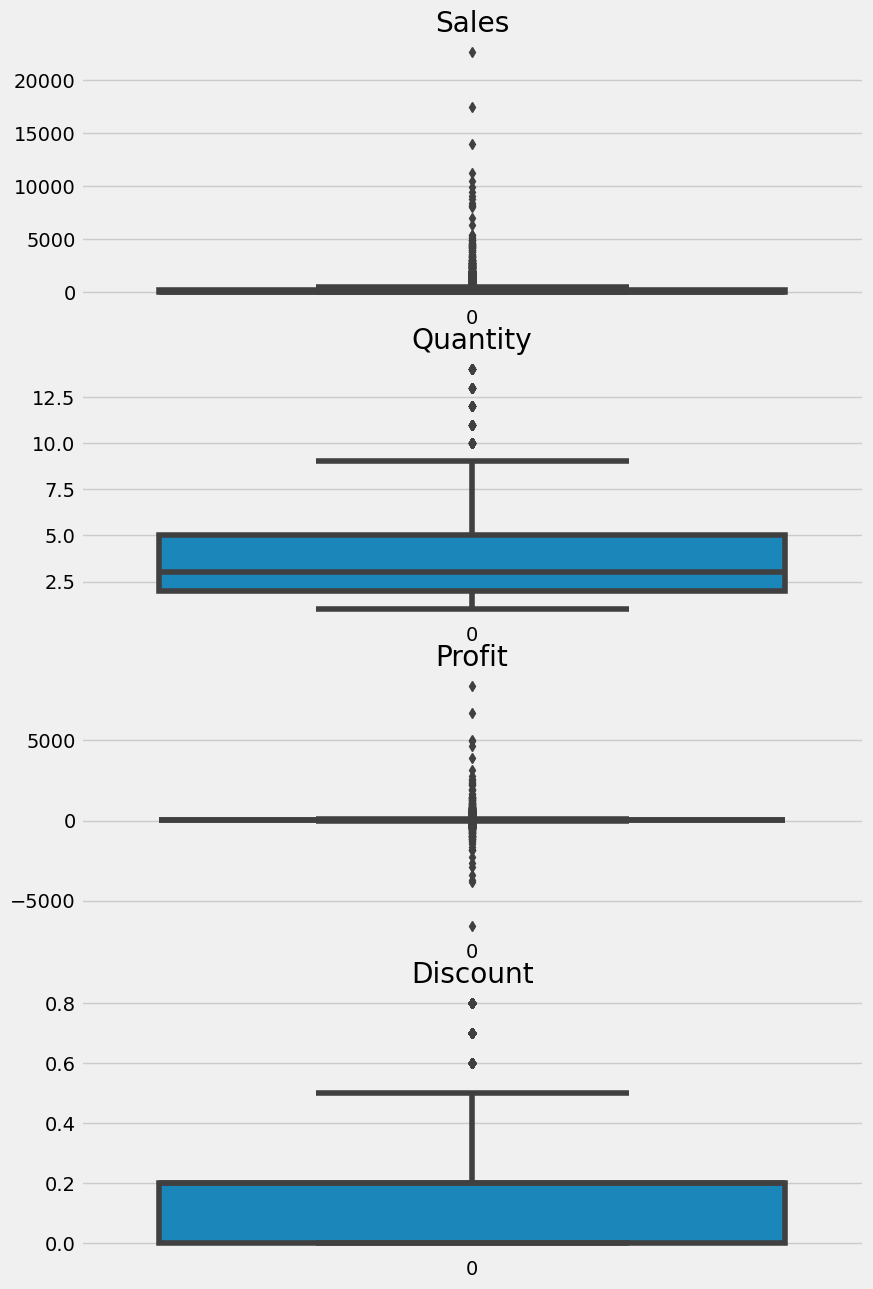

In [7]:
# visualizations
#Boxplots showing the distibutions of numerical values in data dataframe
# by displaying the data quartiles and averages
fig, axs = plt.subplots(4,1) 
fig.set_size_inches(9,15) 
sns.boxplot(data= data['Sales'],ax=axs[0]) 
axs[0].set_title('Sales')                         
sns.boxplot(data=data['Quantity'],ax=axs[1])
axs[1].set_title('Quantity')
sns.boxplot(data=data['Profit'],ax=axs[2])
axs[2].set_title('Profit')
sns.boxplot(data=data['Discount'],ax=axs[3])
axs[3].set_title('Discount')
plt.show()


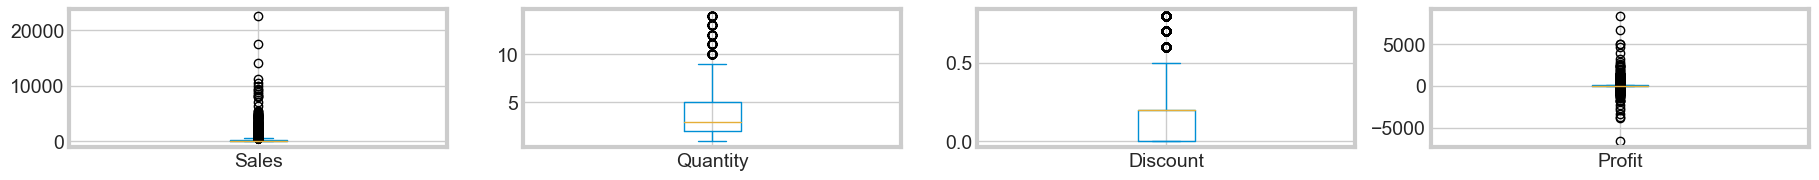

In [12]:
# Boxplot
# all have outliers
# sales and profit have the most outliers
data.plot(kind='box',subplots=True,layout=(8,4),sharex=False,sharey=False)
plt.rcParams['figure.figsize']=[20,16]
plt.show()

Histograms to show distribution

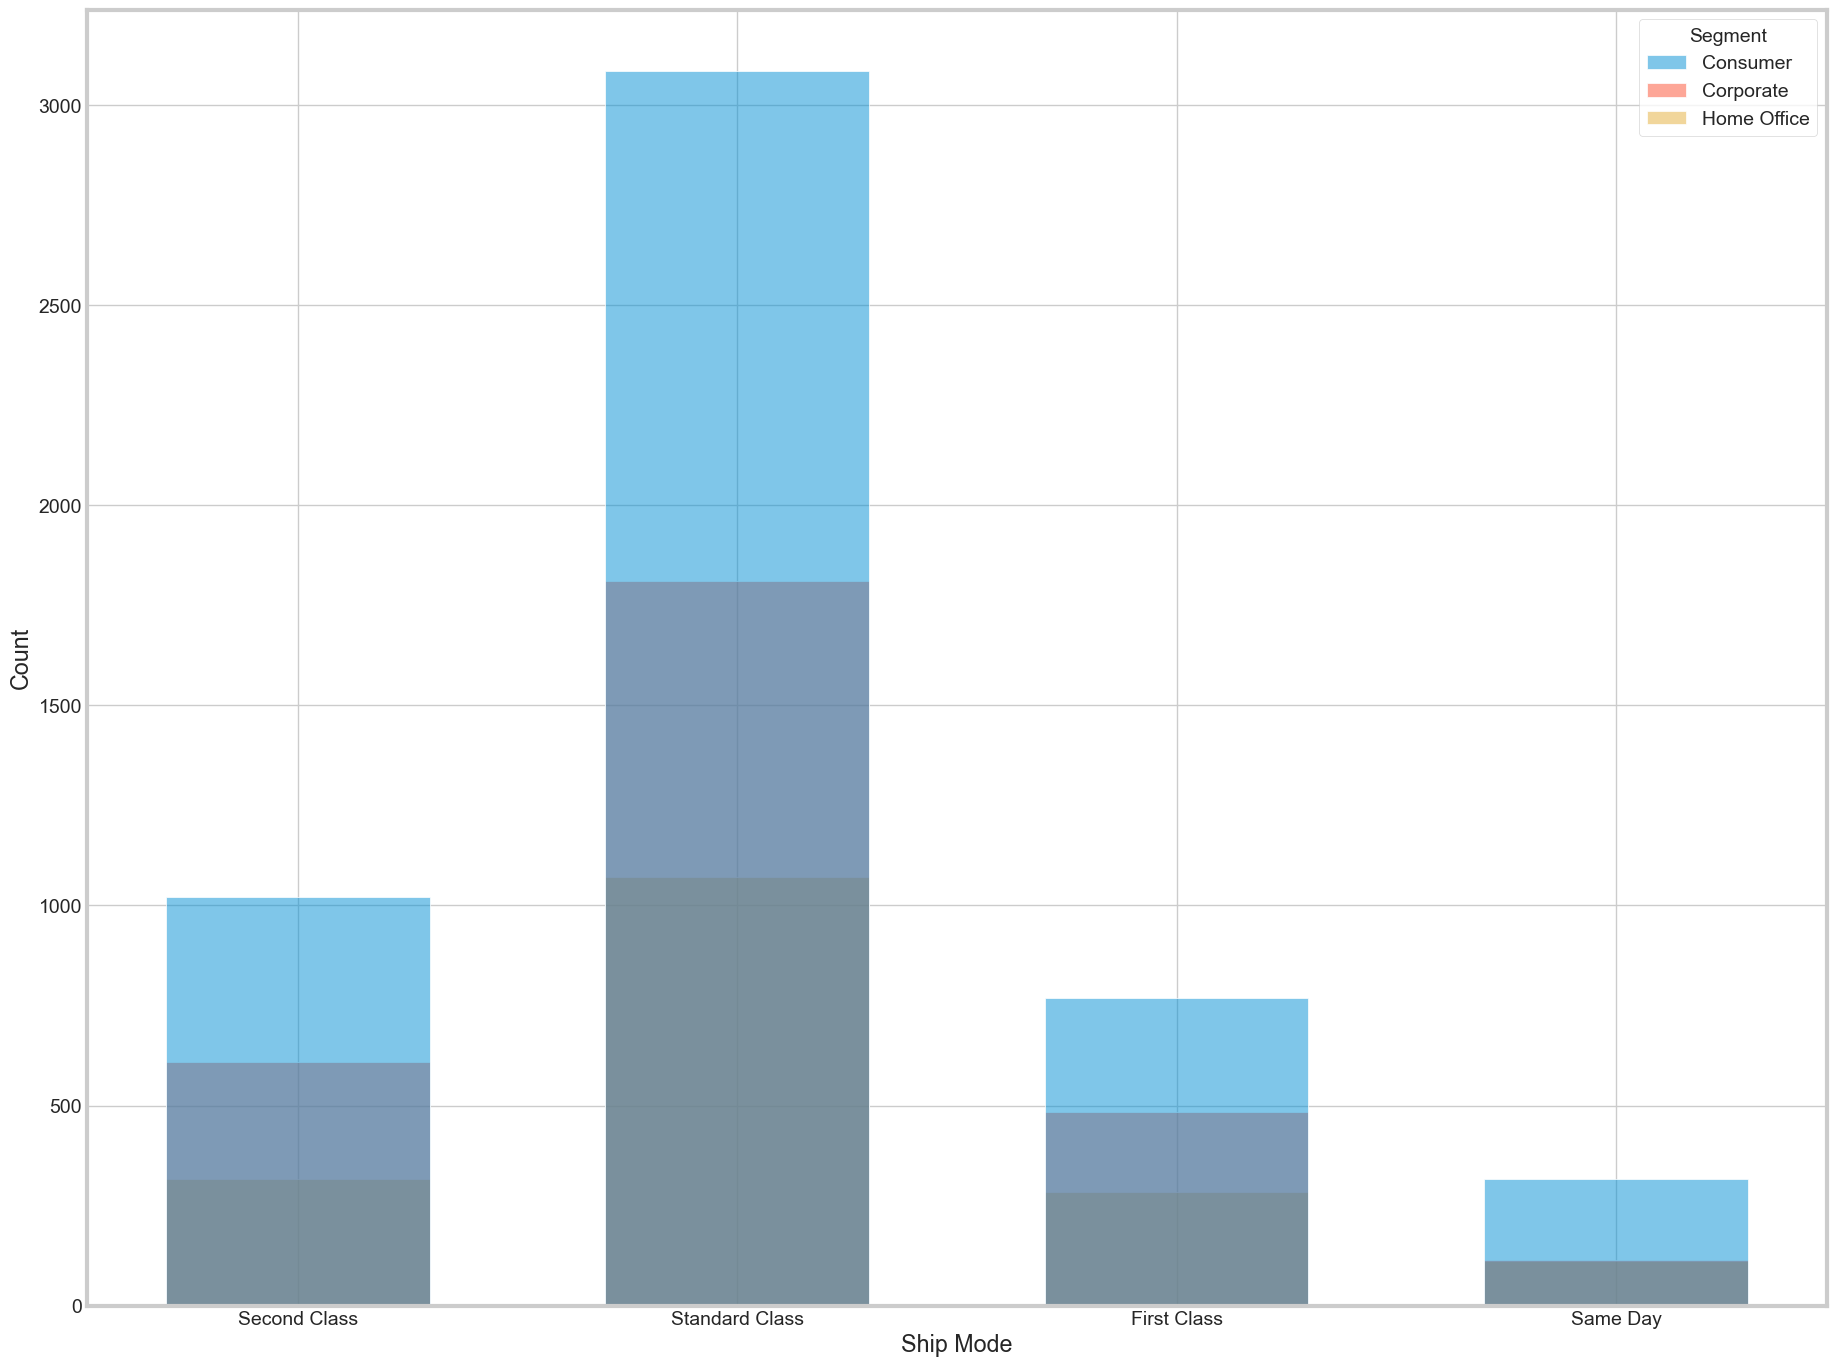

In [9]:
# histogram to show distribution of Shipmode
# frequency of an occurence

sns.set_style('whitegrid')
sns.histplot(x=data['Ship Mode'],bins=10,data=data,binwidth=3,shrink=0.6,hue='Segment')
plt.show()

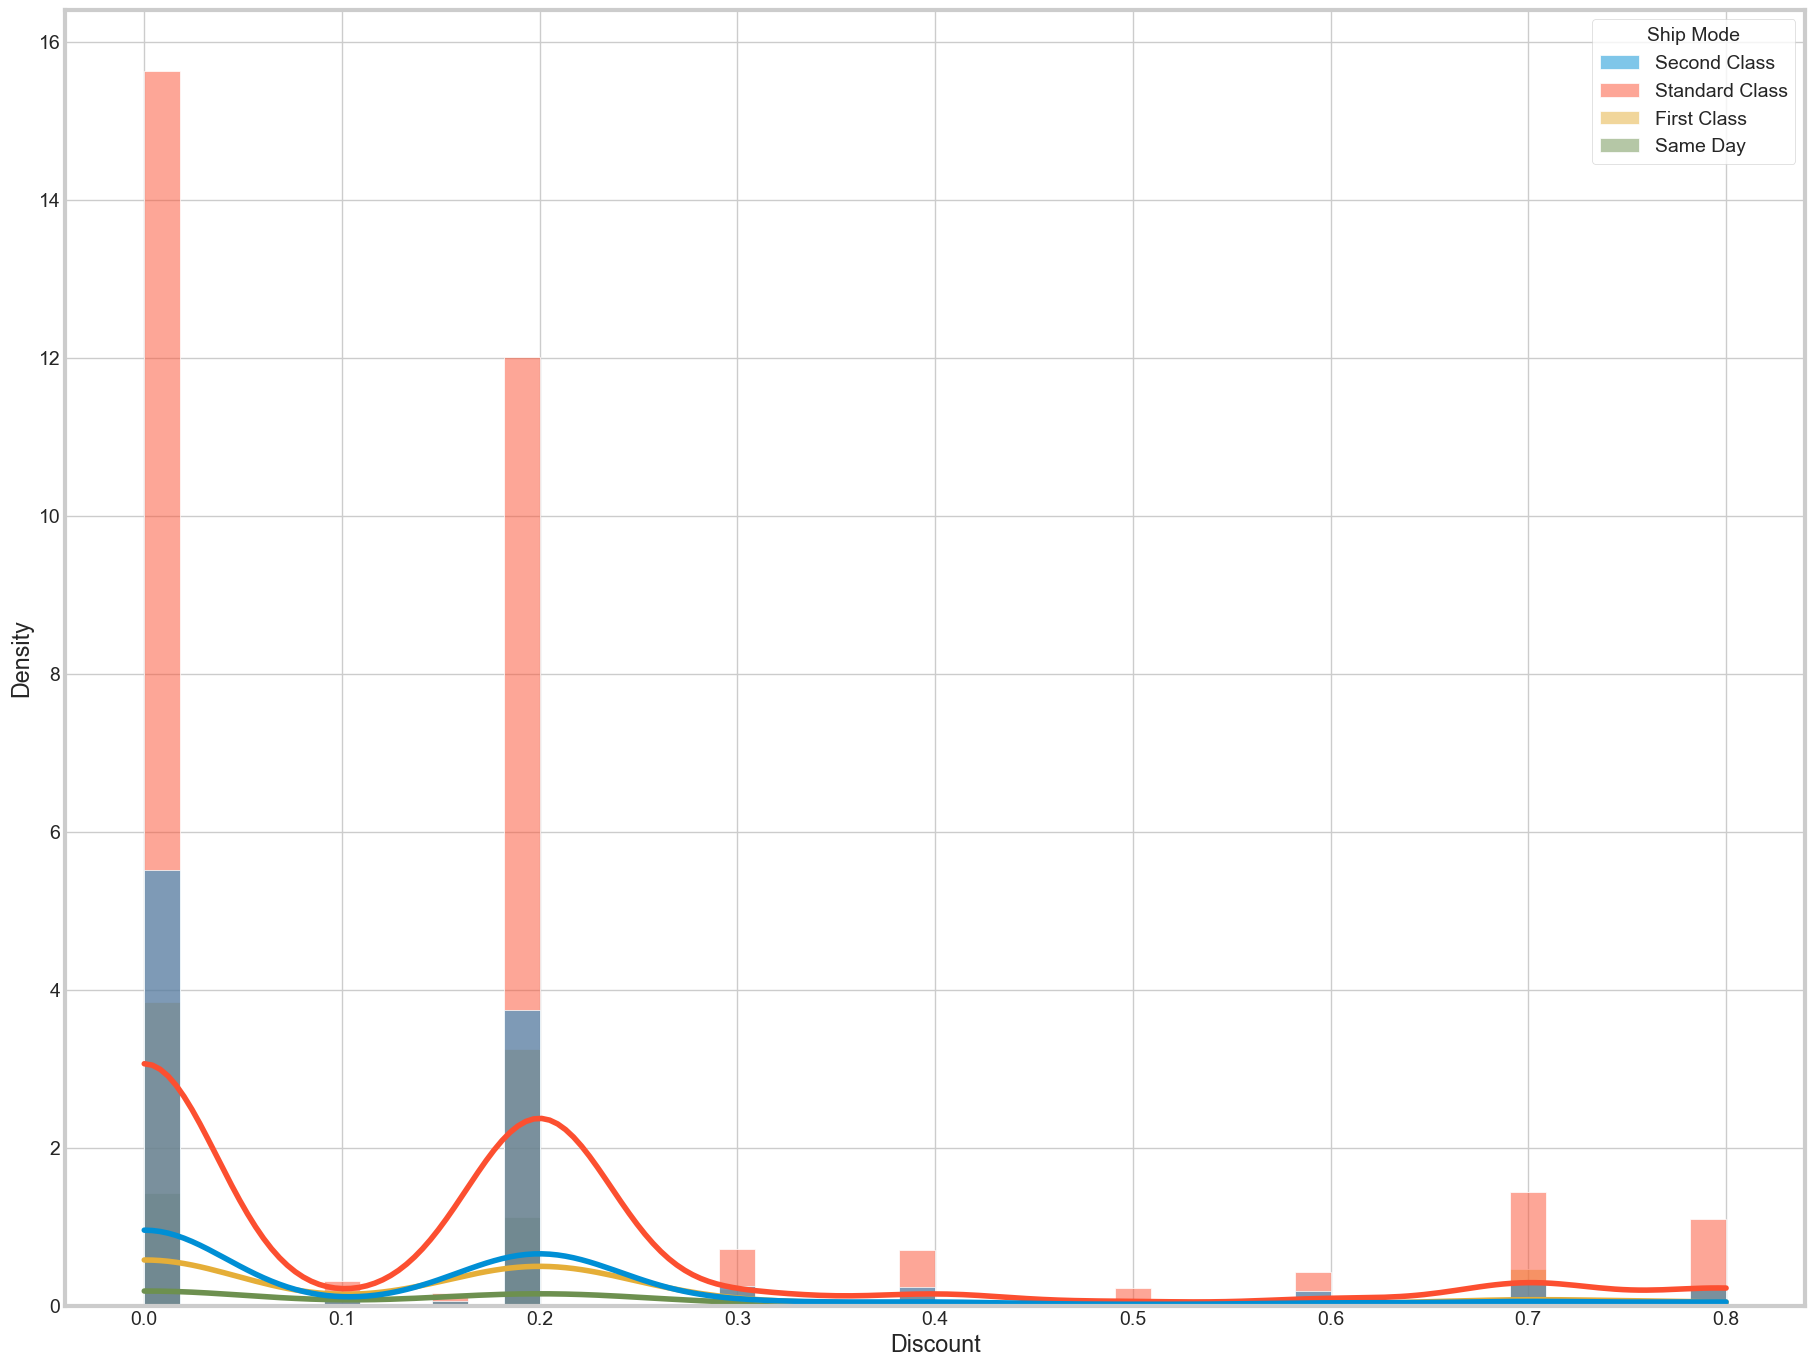

In [13]:
# which ship mode offers a high discount
sns.histplot(x=df['Discount'],data=df,kde=True,hue='Ship Mode',stat='density')
plt.show()

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


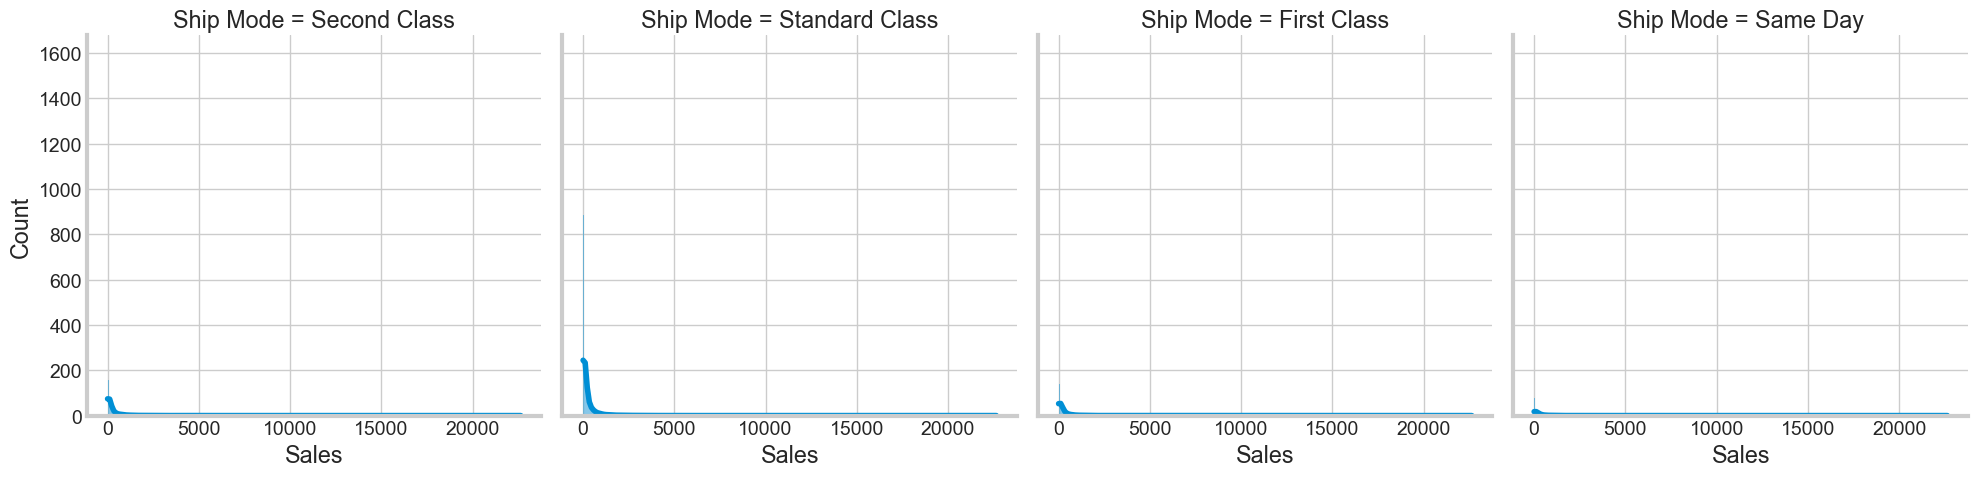

<Figure size 1200x1000 with 0 Axes>

In [18]:
# which shipmode makes a lot of sales
sns.displot(x=data['Sales'],data=df,col='Ship Mode',kde=True,lw=0.8,common_norm=False)
plt.figure(figsize=(12,10))
plt.show()


C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


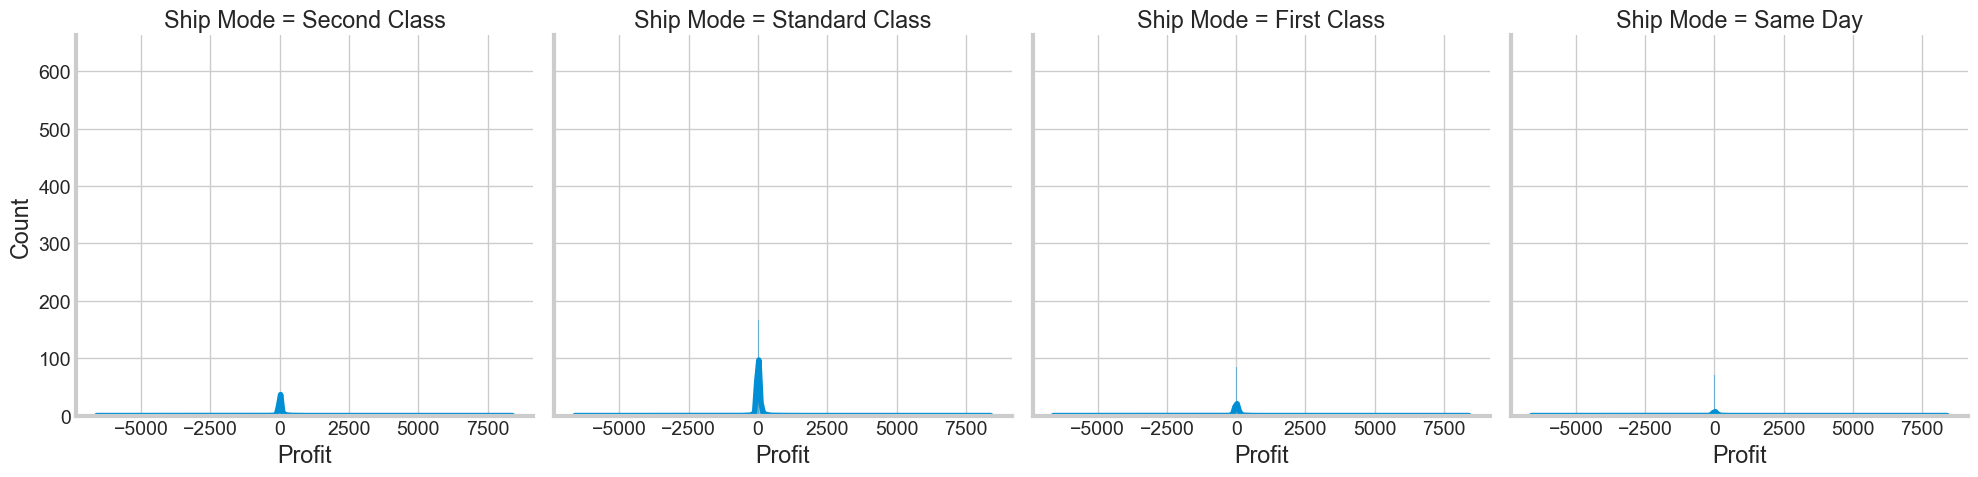

In [15]:
# which ship mode makes a lot of profit
sns.displot(x=data['Profit'],data=data,col='Ship Mode',kde=True,lw=0.8,common_norm=False)
plt.show()

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


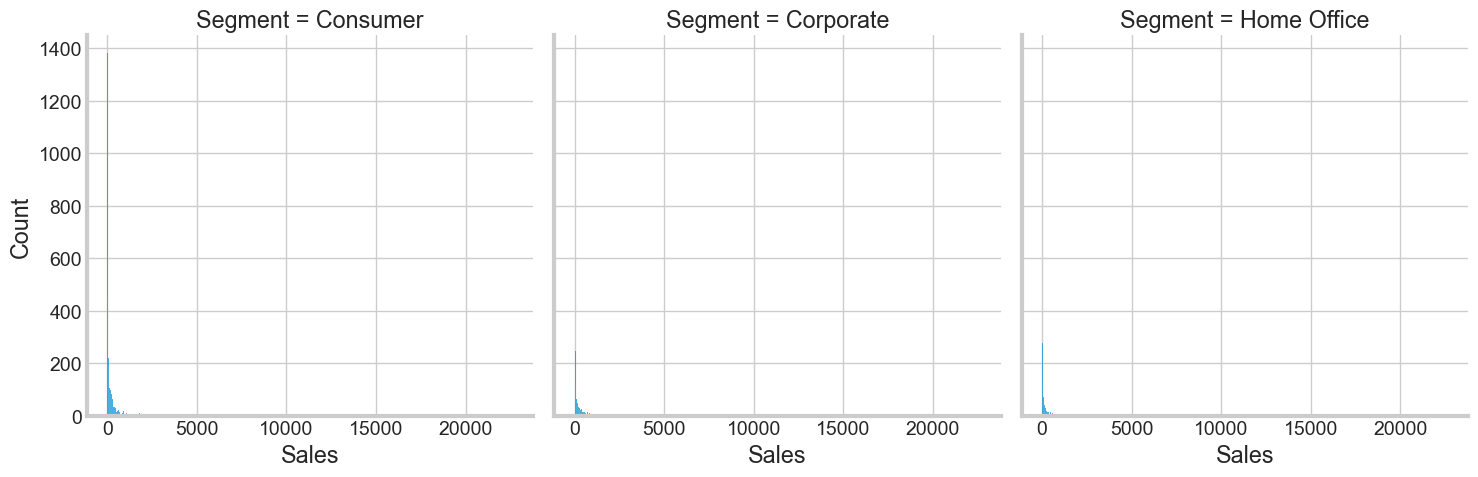

In [20]:
# from which segment is alot of sales gotten from
# Most sales is gotten from the consumers
# the least sales is gotten from the home office segment
sns.displot(x=data['Sales'],data=data,col='Segment',kde=False,lw=0.8,common_norm=False)
plt.show()

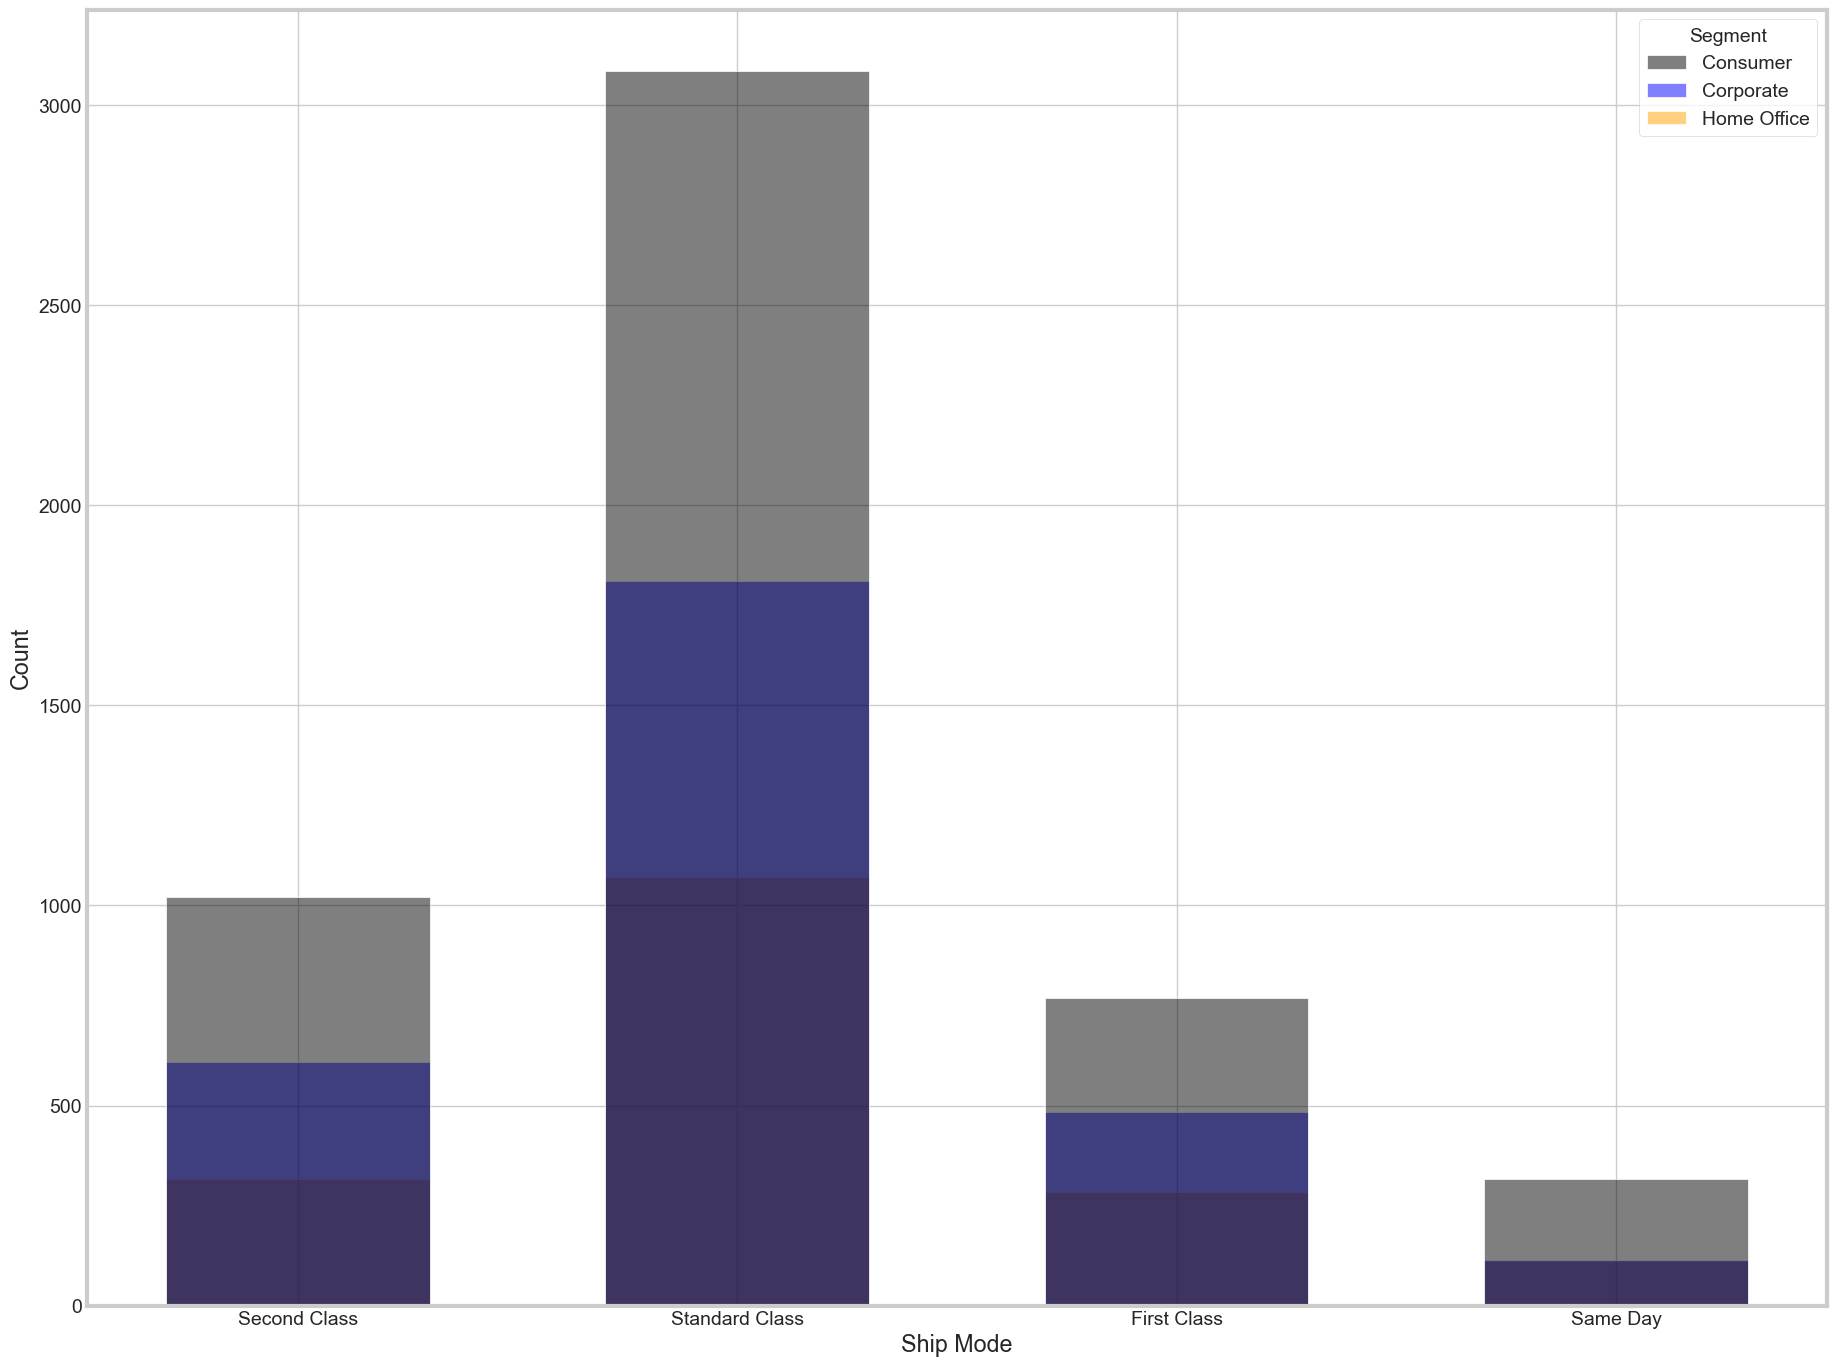

In [21]:
# distribution of the ship modes used
# shows which segment use a particular ship mode least or most

sns.histplot(x=df['Ship Mode'],bins=10,data=df,shrink=0.6,hue='Segment',palette=['Black','Blue','orange'])
plt.show()

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


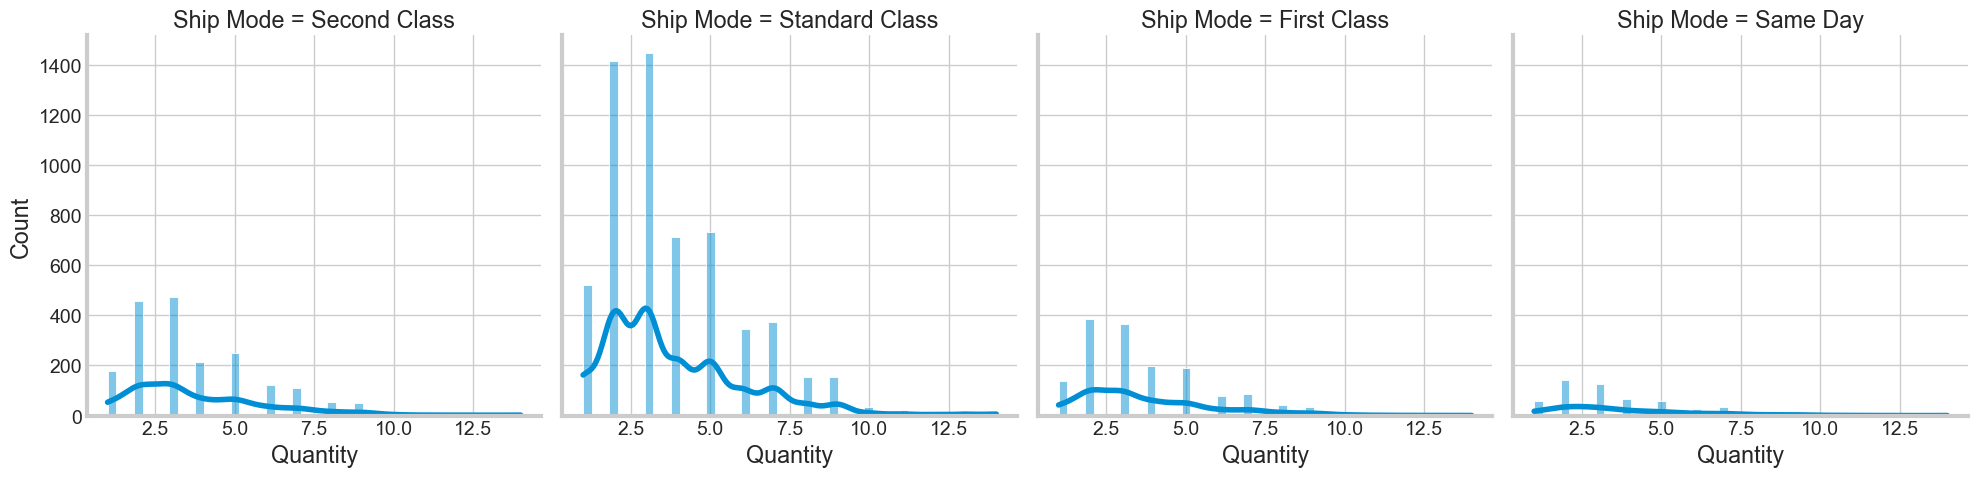

In [22]:
# distribution of the shipping modes with the quantity of goods shipped 
sns.displot(x=data['Quantity'],data=data,col='Ship Mode',kde=True,lw=0.8,common_norm=False)
plt.show()

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


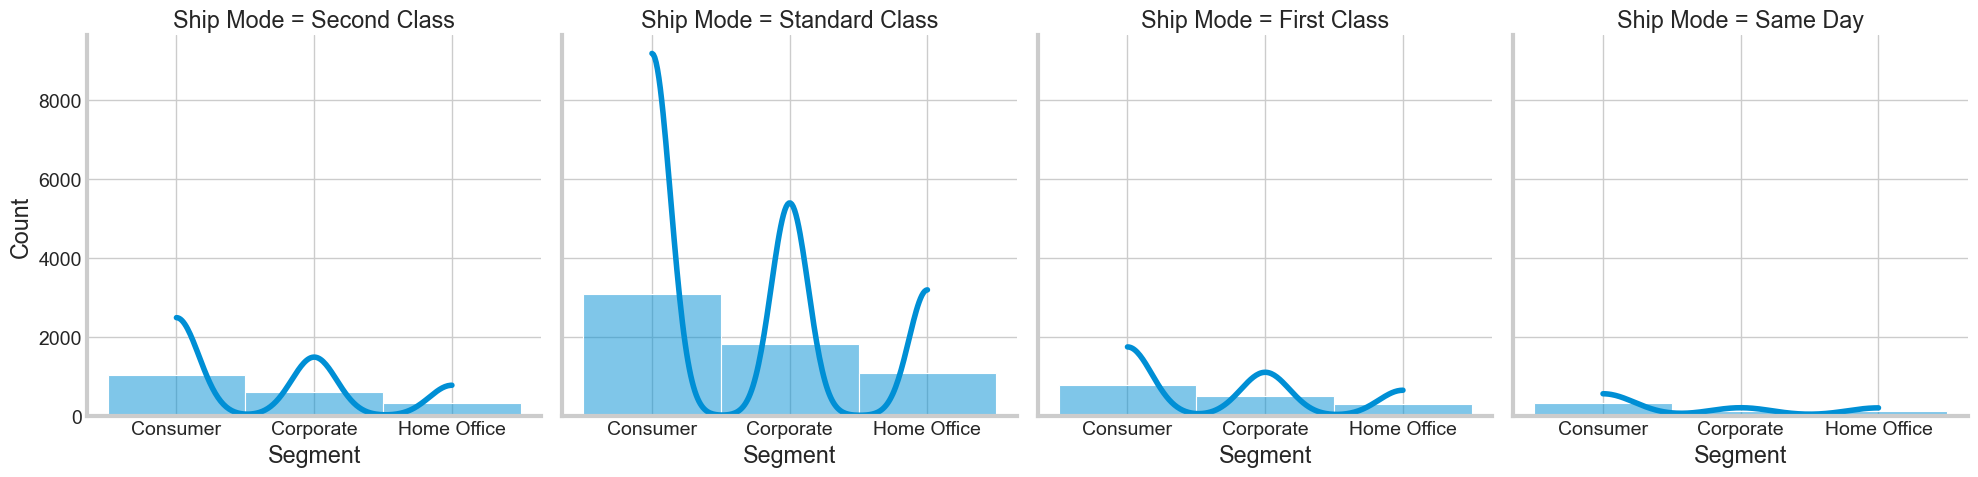

In [24]:
#Standard class mode used shipment mode used mostly
# the segment that order products is The consumer segment
sns.displot(x=data['Segment'],data=data,col='Ship Mode',kde=True,lw=0.8,common_norm=False)
plt.show()

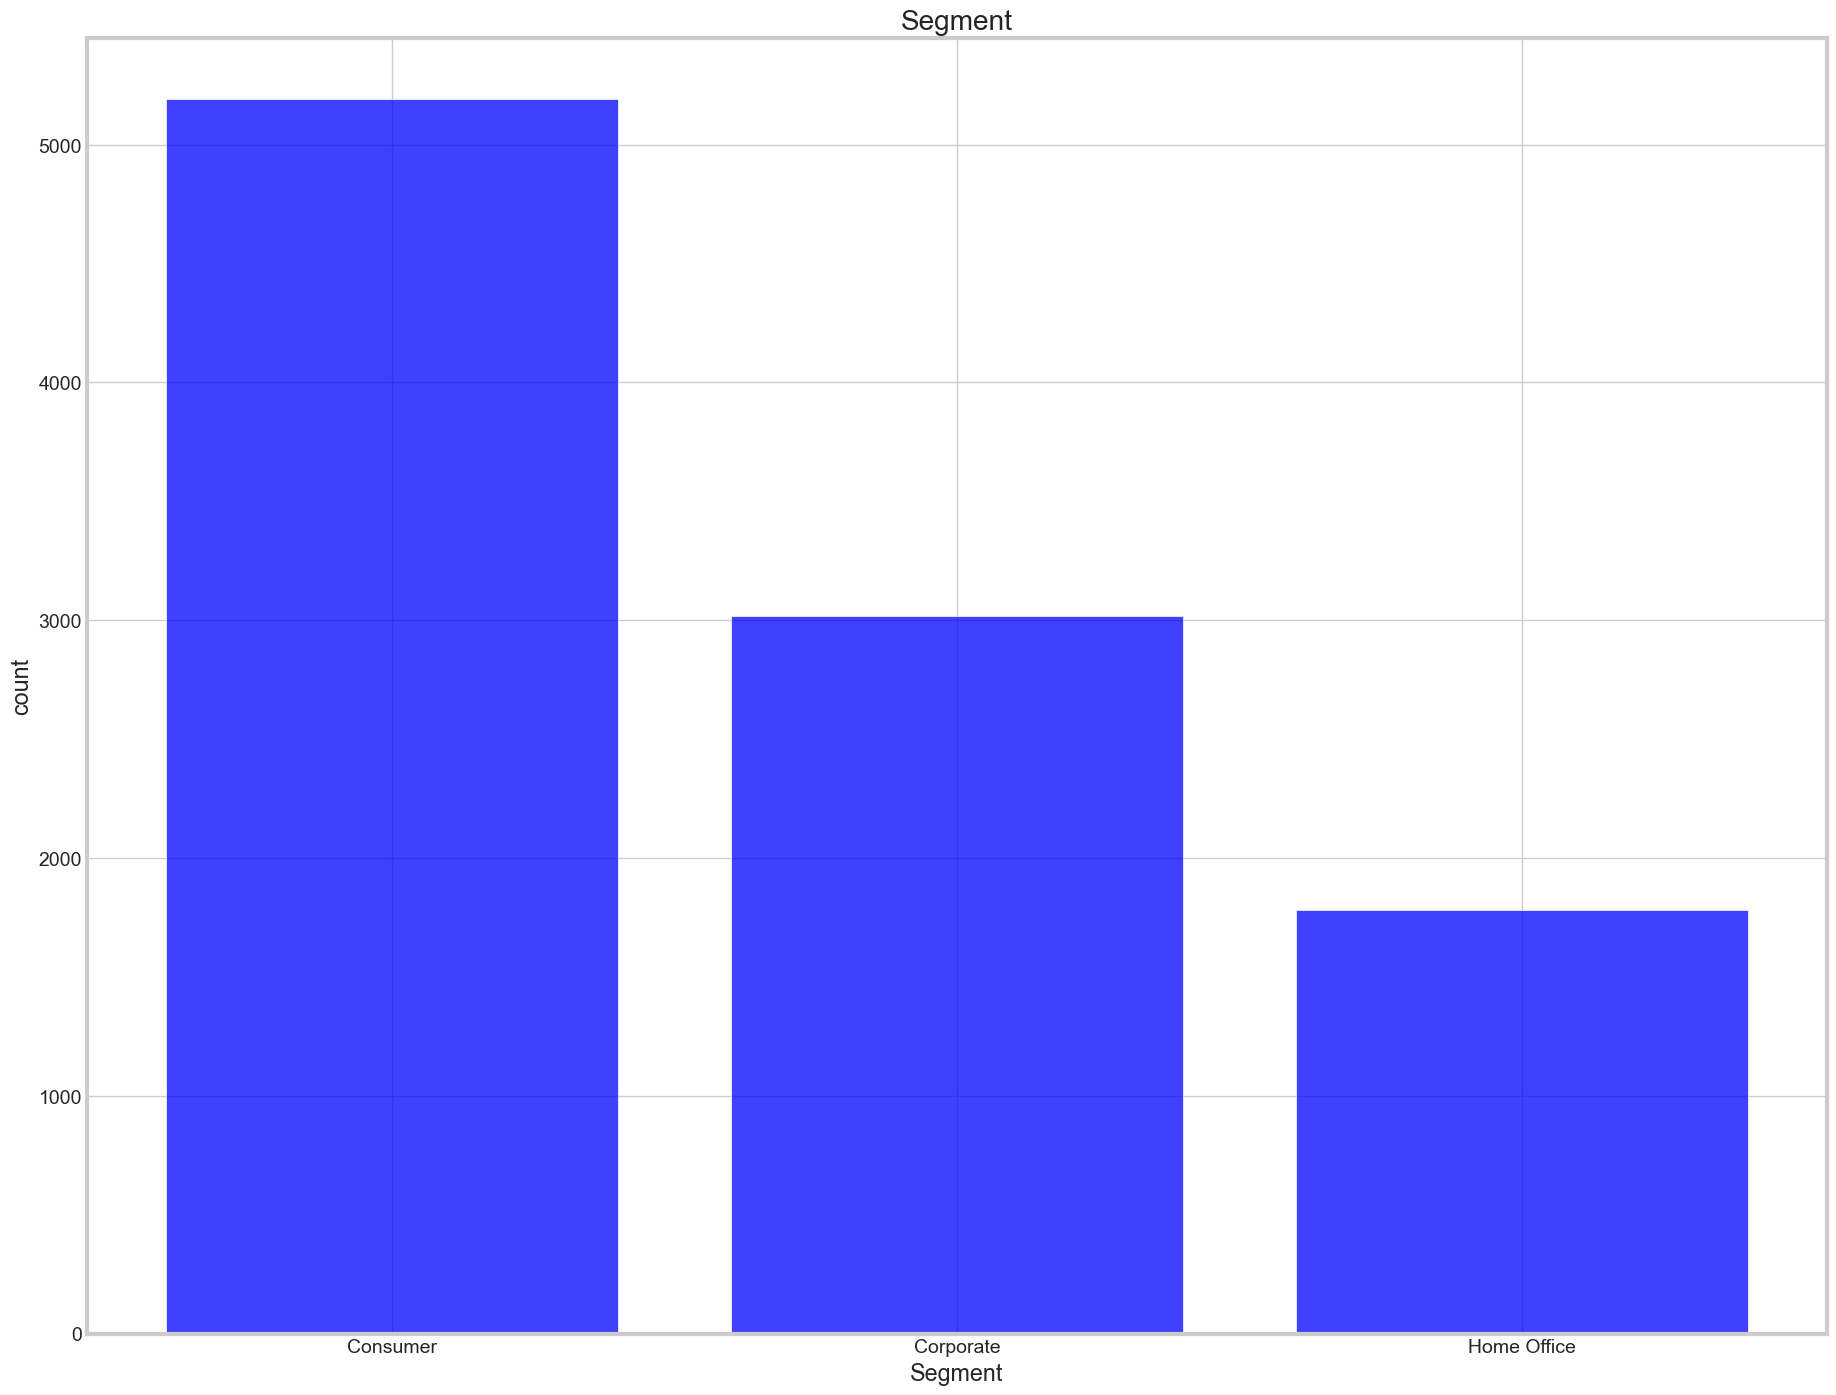

In [25]:
#showing the distribution of segment 
sns.histplot(x=df['Segment'],bins=10,data=df,shrink=0.8,color='blue')
plt.title('Segment')
plt.xlabel('Segment')
plt.ylabel('count')
plt.show()

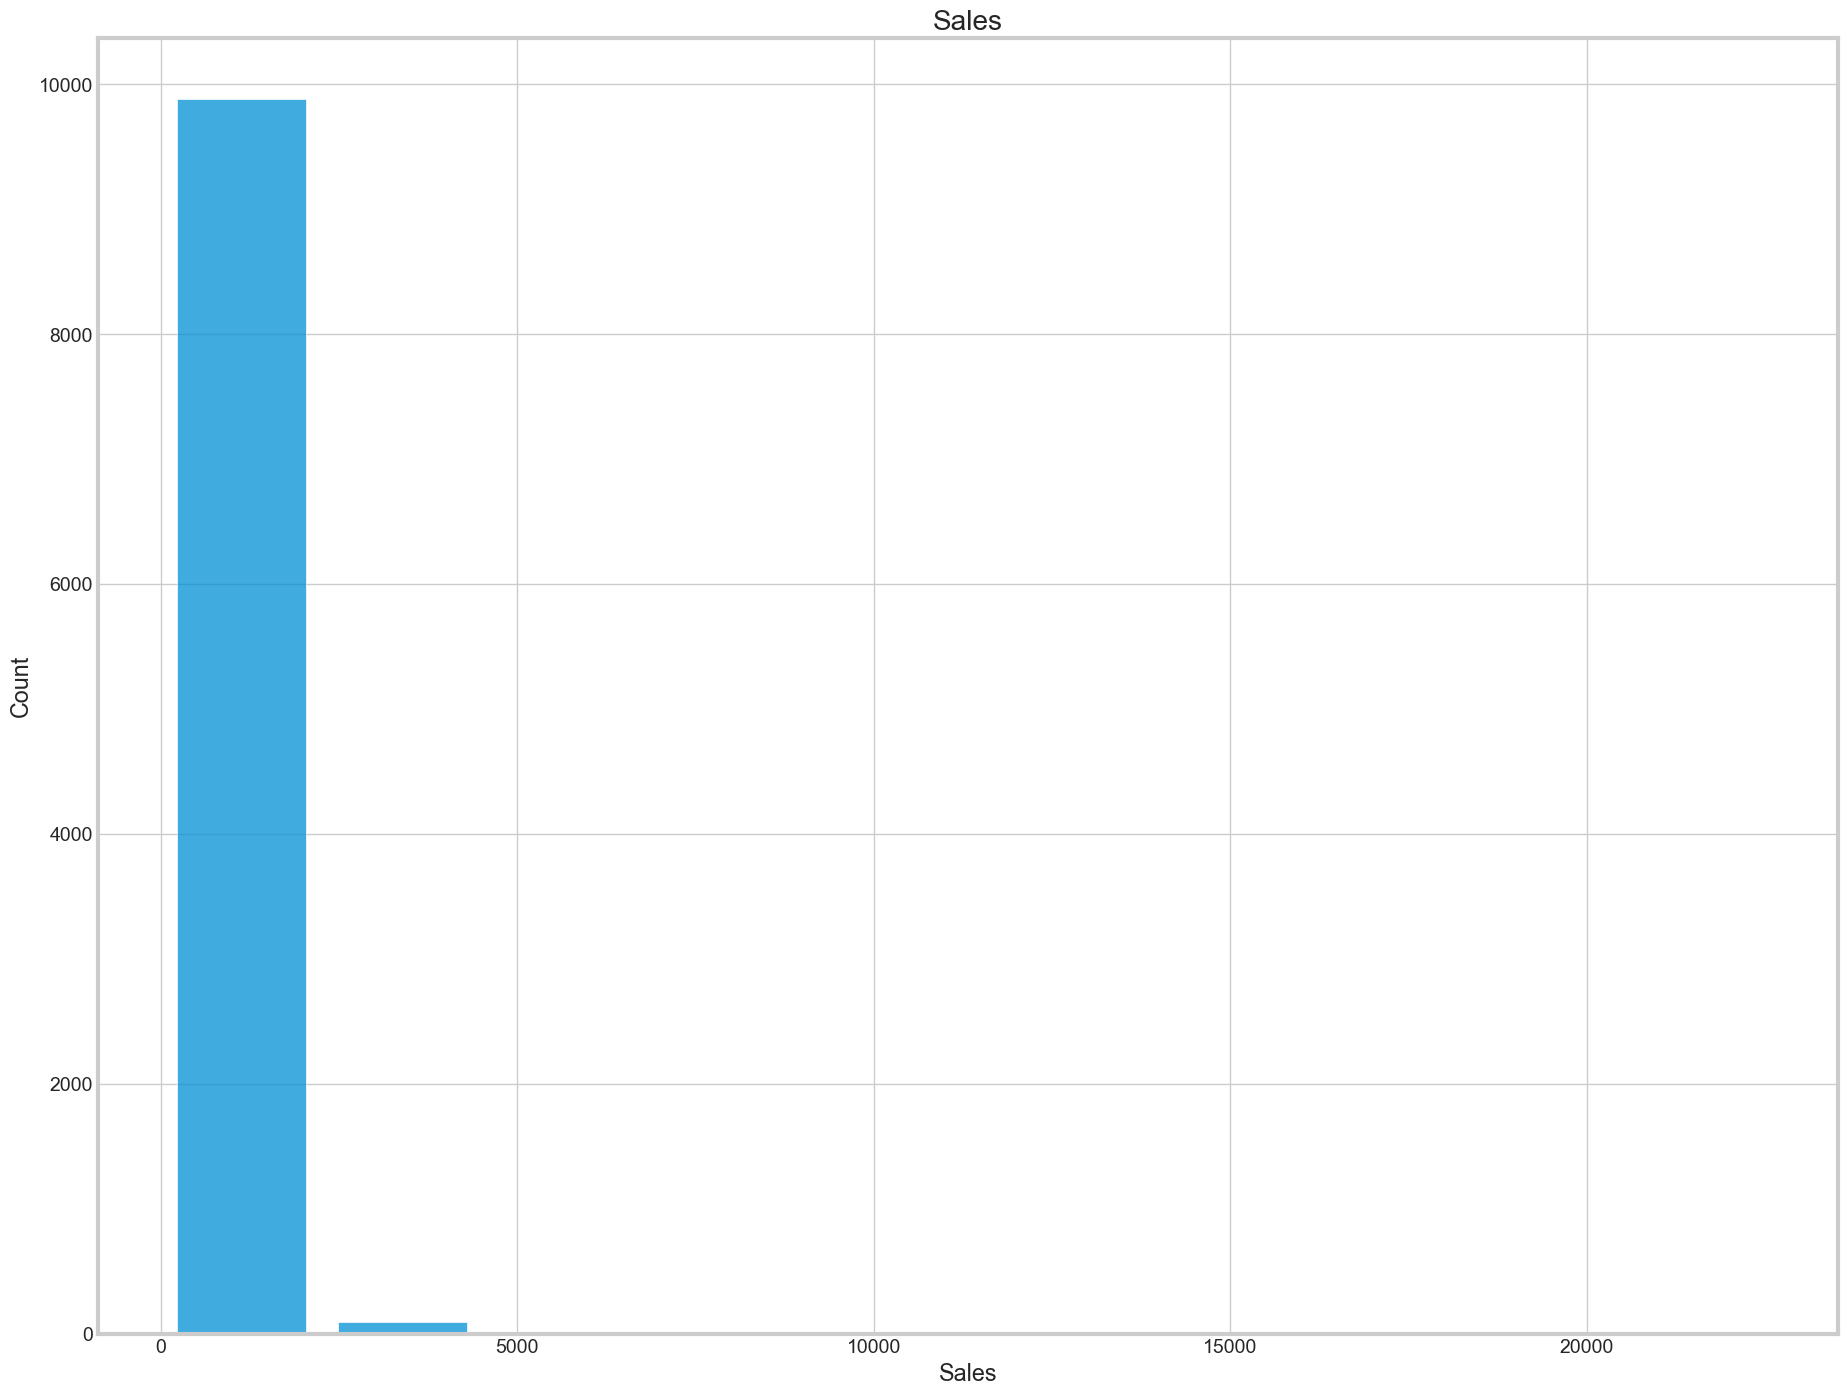

In [26]:
# plt.show()
sns.histplot(x=df['Sales'],bins=10,shrink=0.8)
plt.title('Sales')
plt.show()

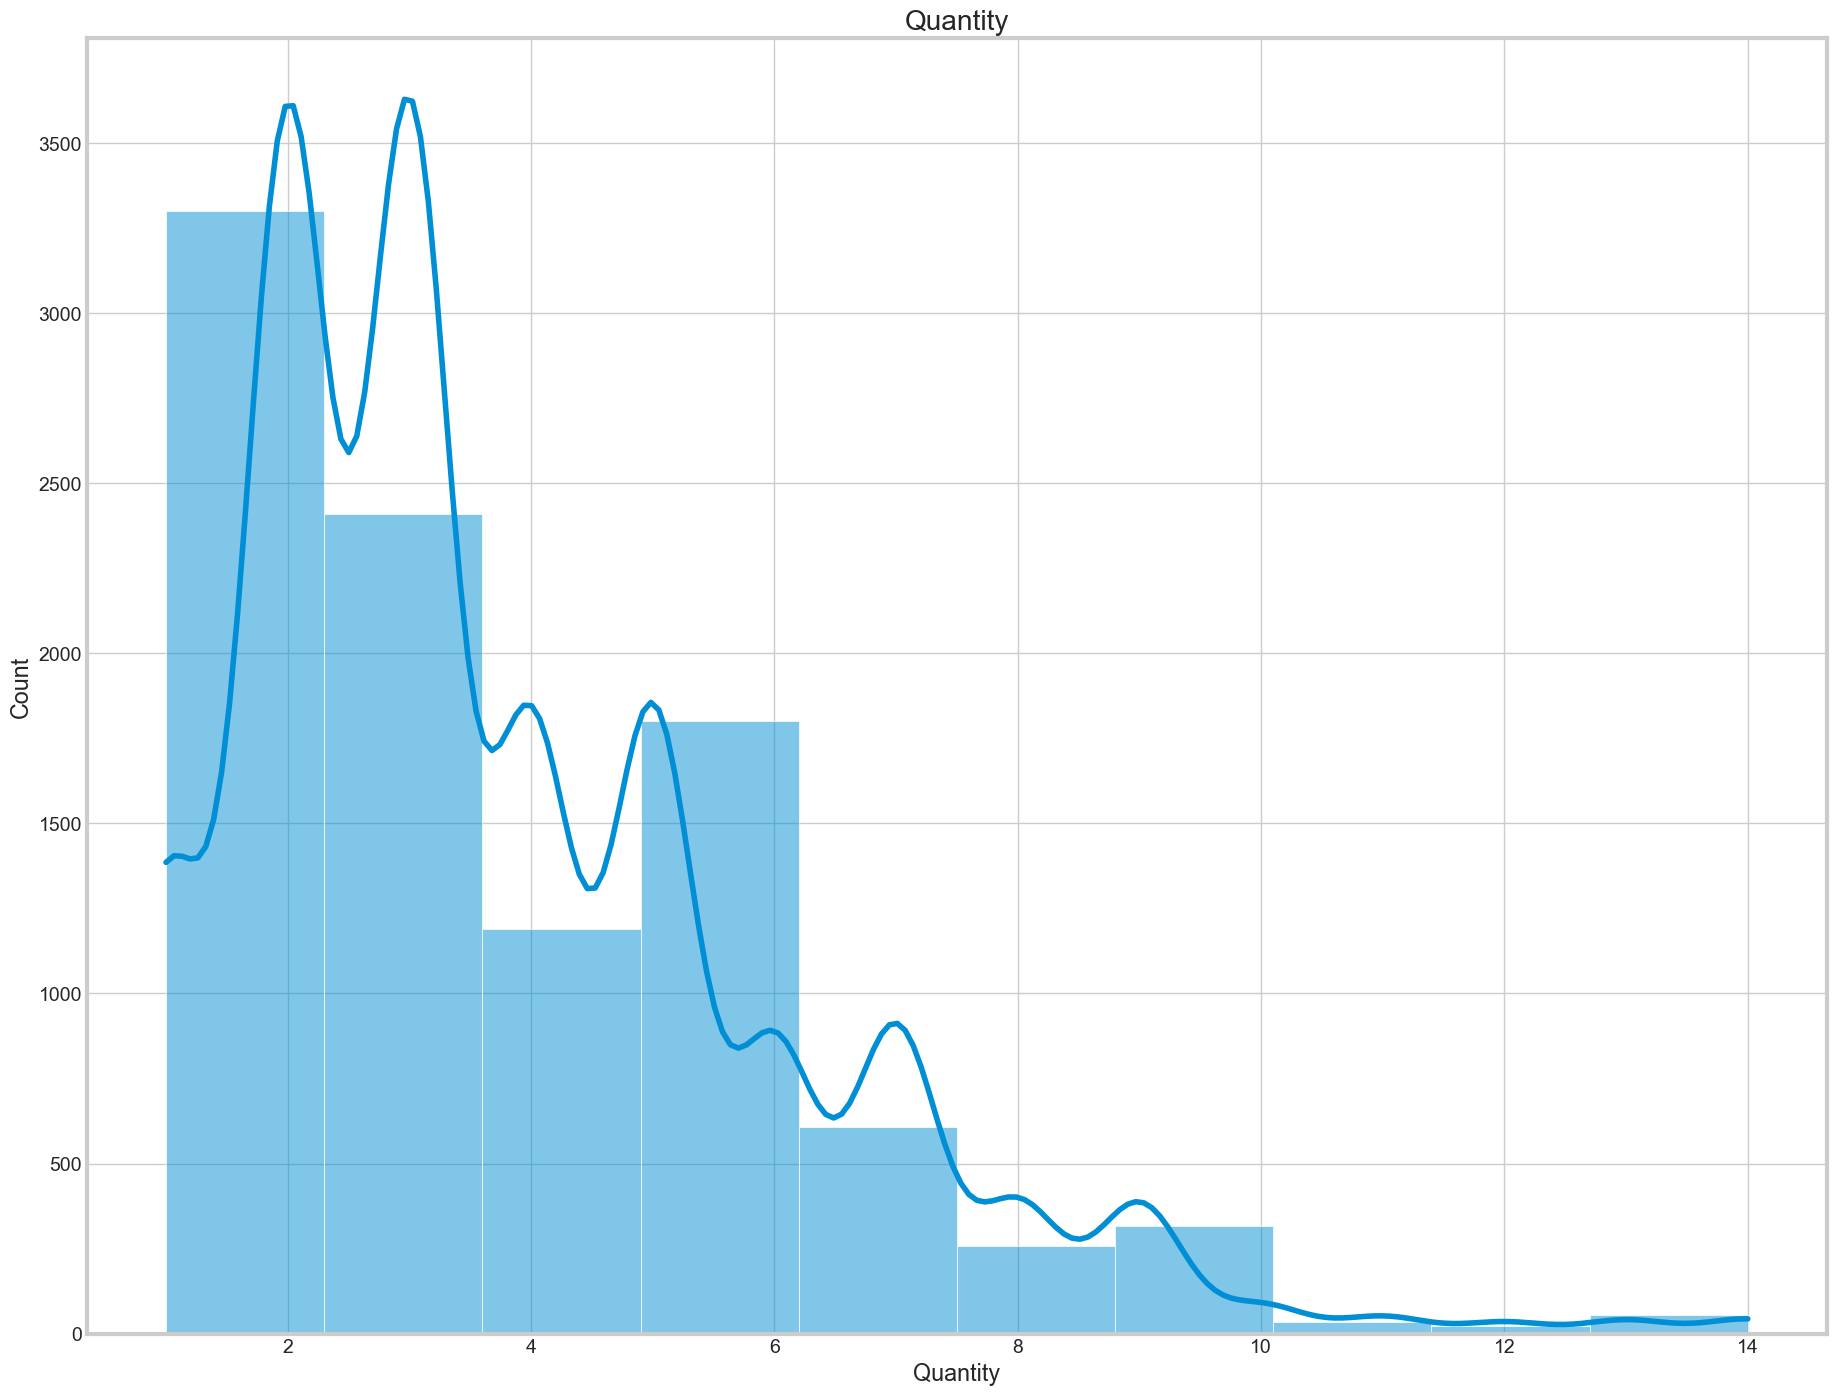

In [27]:
#Histogram to show the distribution of quantities of the products shipped
# shows skewed distributions
sns.histplot(x=df['Quantity'],bins=10,kde=True)
plt.title('Quantity')
plt.show()

In [ ]:
# dataset has skewed distribution
sns.displot(x=df['Quantity'],kind='kde',lw=0.8)
plt.title('Quantity')
plt.show()

In [ ]:
sns.histplot(x=df['Discount'],bins=10)
plt.title('Discount')
plt.show()

In [ ]:
sns.histplot(df['Profit'],bins=10)
plt.title('Profit')
plt.show()

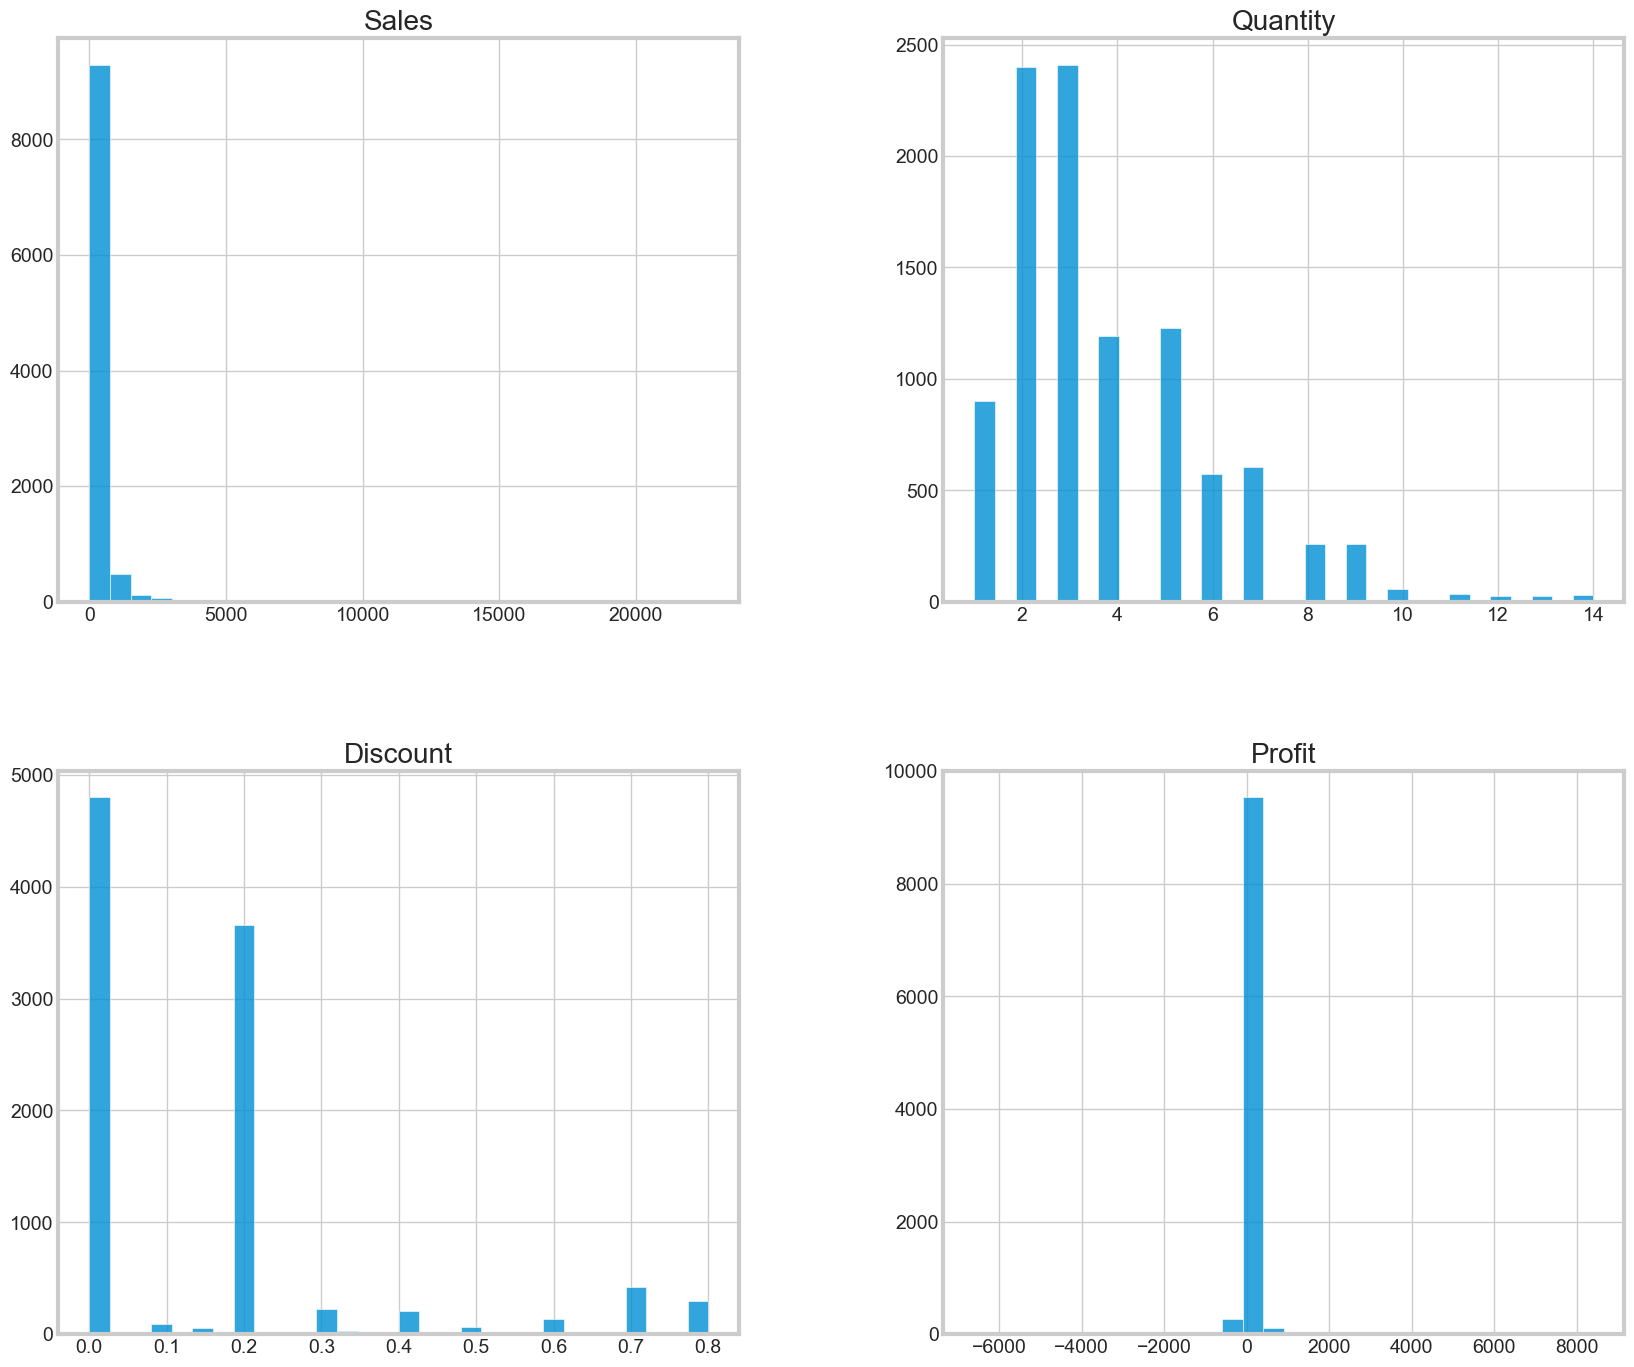

In [28]:
# distribution of data using a histogram for each column with numerical data in the subset data
# Visualize all the histograms for each column with numerical data in the subset data
data.hist(bins=30,figsize=(18,16),alpha=0.8)
plt.show()

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


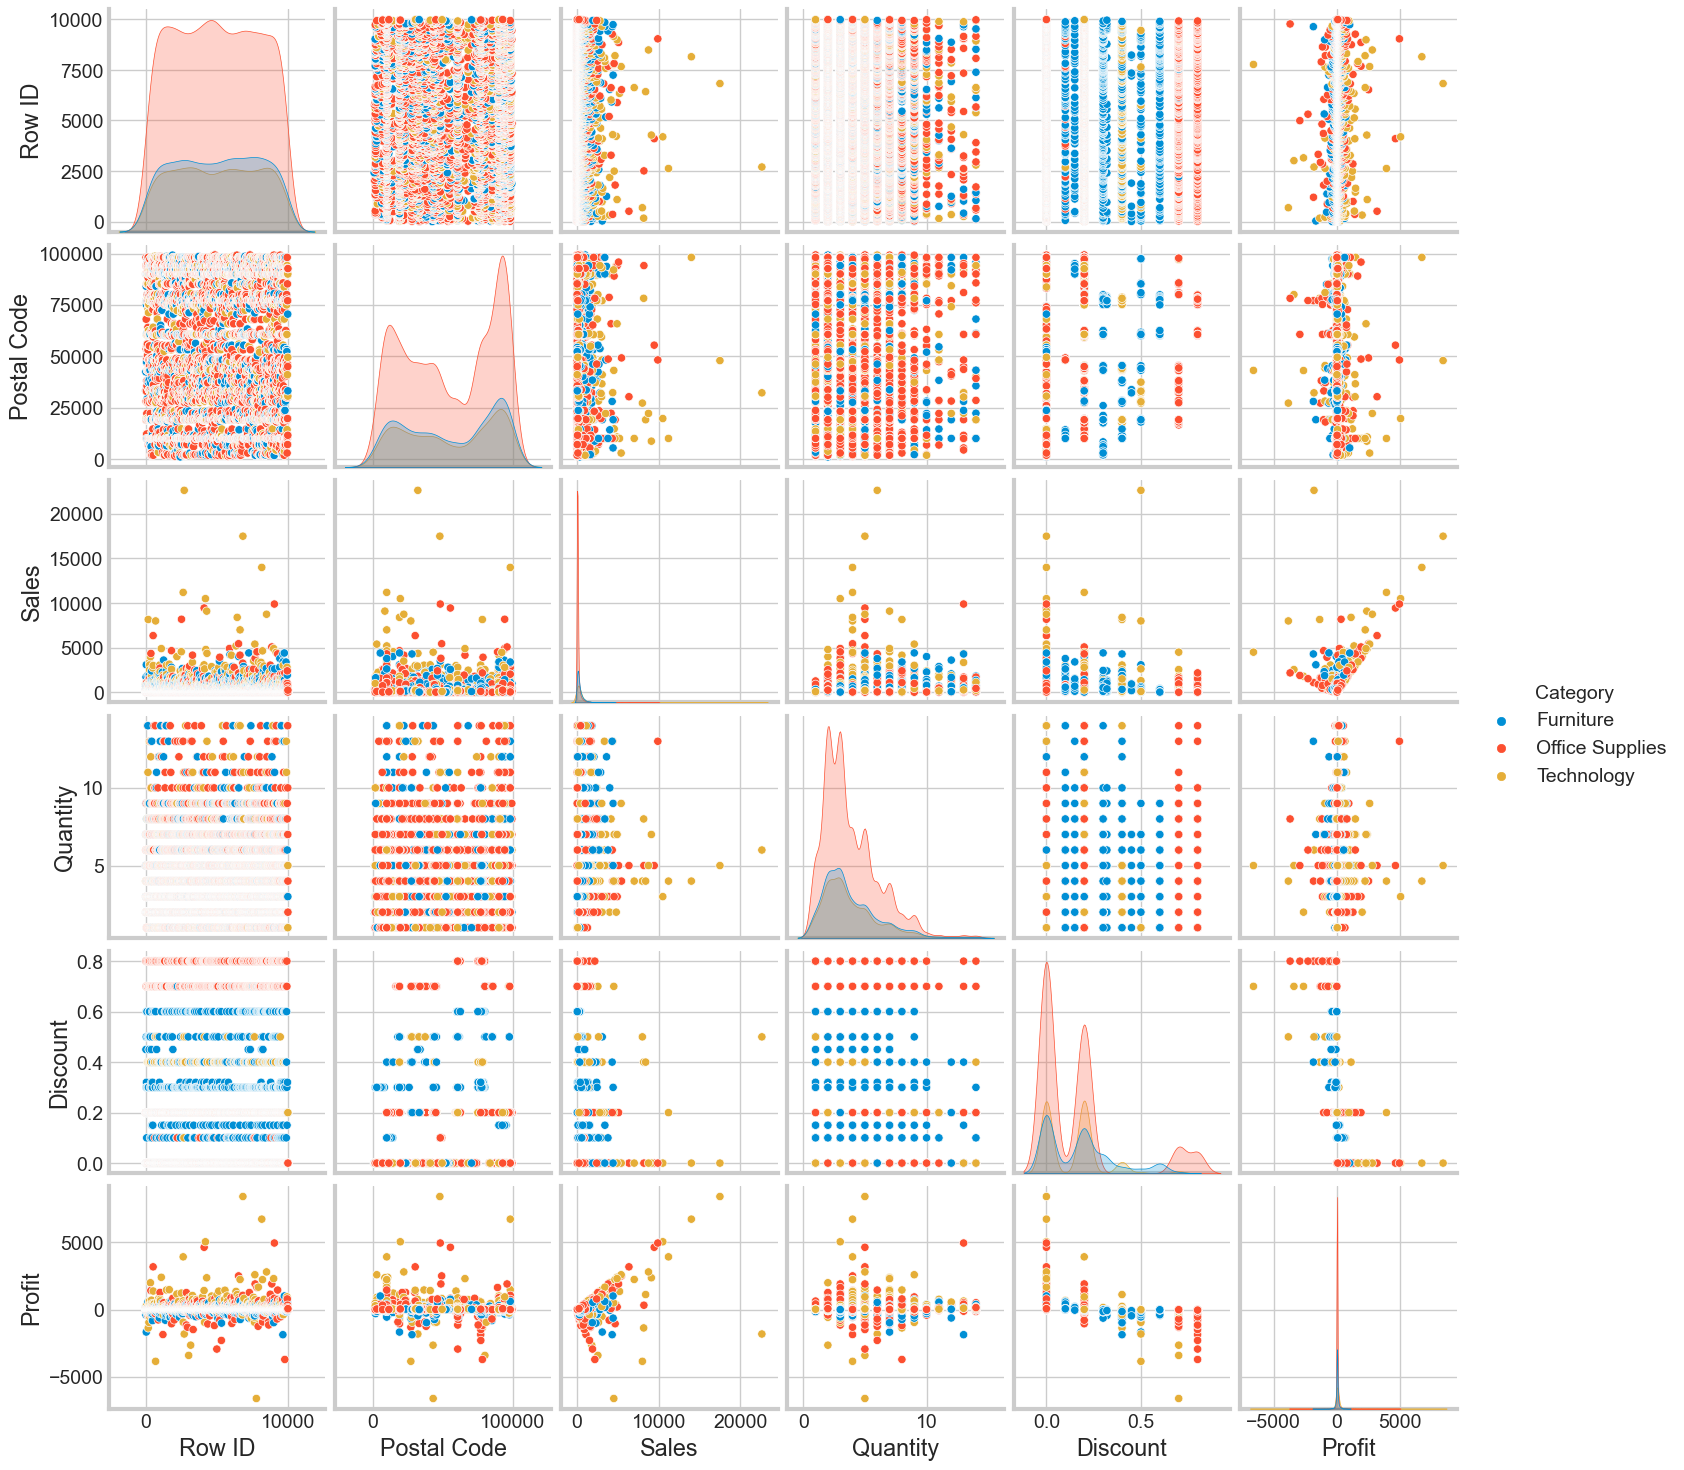

In [29]:
# sns.pairplot(df,hue='Ship Mode')
# plt.show()

sns.pairplot(df,hue='Category')
plt.show()

# used to understand the best set of features to explain a relationship btw two variables or to form the most separated clusters
# enhance understanding with a single plot

In [30]:
data['Ship Mode'].unique()
# distributions of the ship mode
data['Ship Mode'].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [31]:
# subsetbased on quantity and city
a=data[['Quantity','City']]
a
# Distribution of quantity across the cities
# df[['Quantity','City']].value_counts()

,Quantity,City
0,2,Henderson
1,3,Henderson
2,2,Los Angeles
3,5,Fort Lauderdale
4,2,Fort Lauderdale
...,...,...
9989,3,Miami
9990,2,Costa Mesa
9991,2,Costa Mesa
9992,4,Costa Mesa


In [32]:
# Distribution of sales
data.groupby(['City','Quantity'],as_index=False)['Sales'].sum()


,City,Quantity,Sales
0,Aberdeen,3,25.500
1,Abilene,2,1.392
2,Akron,2,1699.486
3,Akron,3,672.084
4,Akron,4,35.712
...,...,...,...
2307,Yucaipa,5,50.800
2308,Yuma,4,10.496
2309,Yuma,5,599.985
2310,Yuma,6,44.856


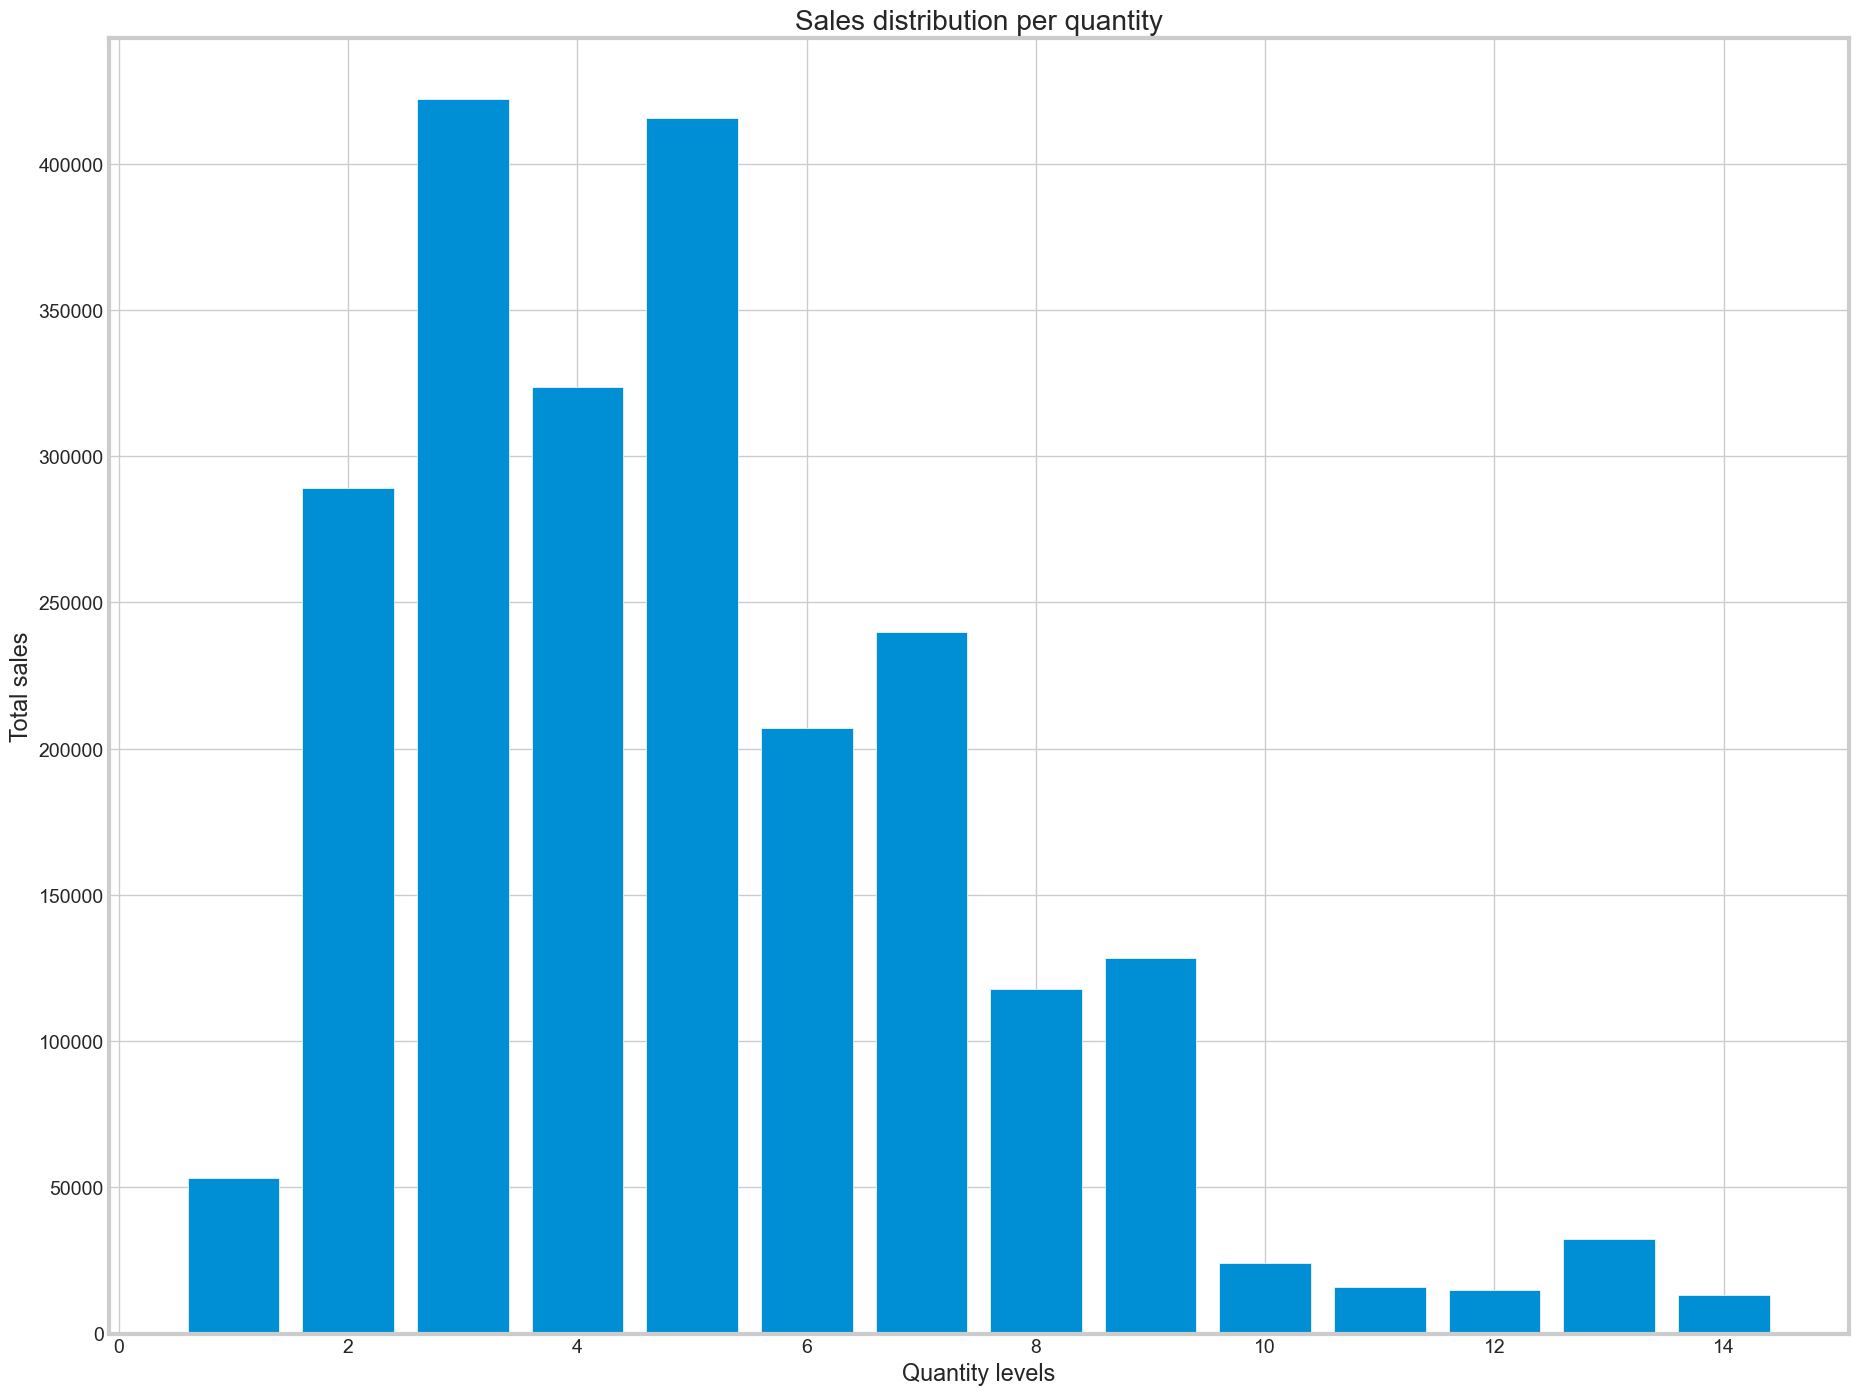

In [33]:
# Quantity_sales subset
Quant_sales = {}
Quantity_sales =data[['Quantity','Sales']]
for i in Quantity_sales.Quantity.unique():
    Quant_sales[i] = [data['Sales'][v] for v in data[data["Quantity"] == i].index]

Total_sales ={}
for key, value in Quant_sales.items():
    Total_sales[key] = sum(value)

sale_T = Total_sales.items()
Sorted_sales = sorted(sale_T, key=lambda x: x[0])
x = dict(Sorted_sales).keys()
y = dict(Sorted_sales).values()


fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_ylabel('Total sales')
ax.set_xlabel('Quantity levels')
# ax.set_xticklabels(np.arange(0,15,1)+1)
ax.set_title('Sales distribution per quantity');

# The result shows that sales were high for quantity levels 3 and 4 beyond 400000 sales in total for each
# Low sales are recorded for quantities 1,10,11,12,13 and 14 have 50000 and below sales

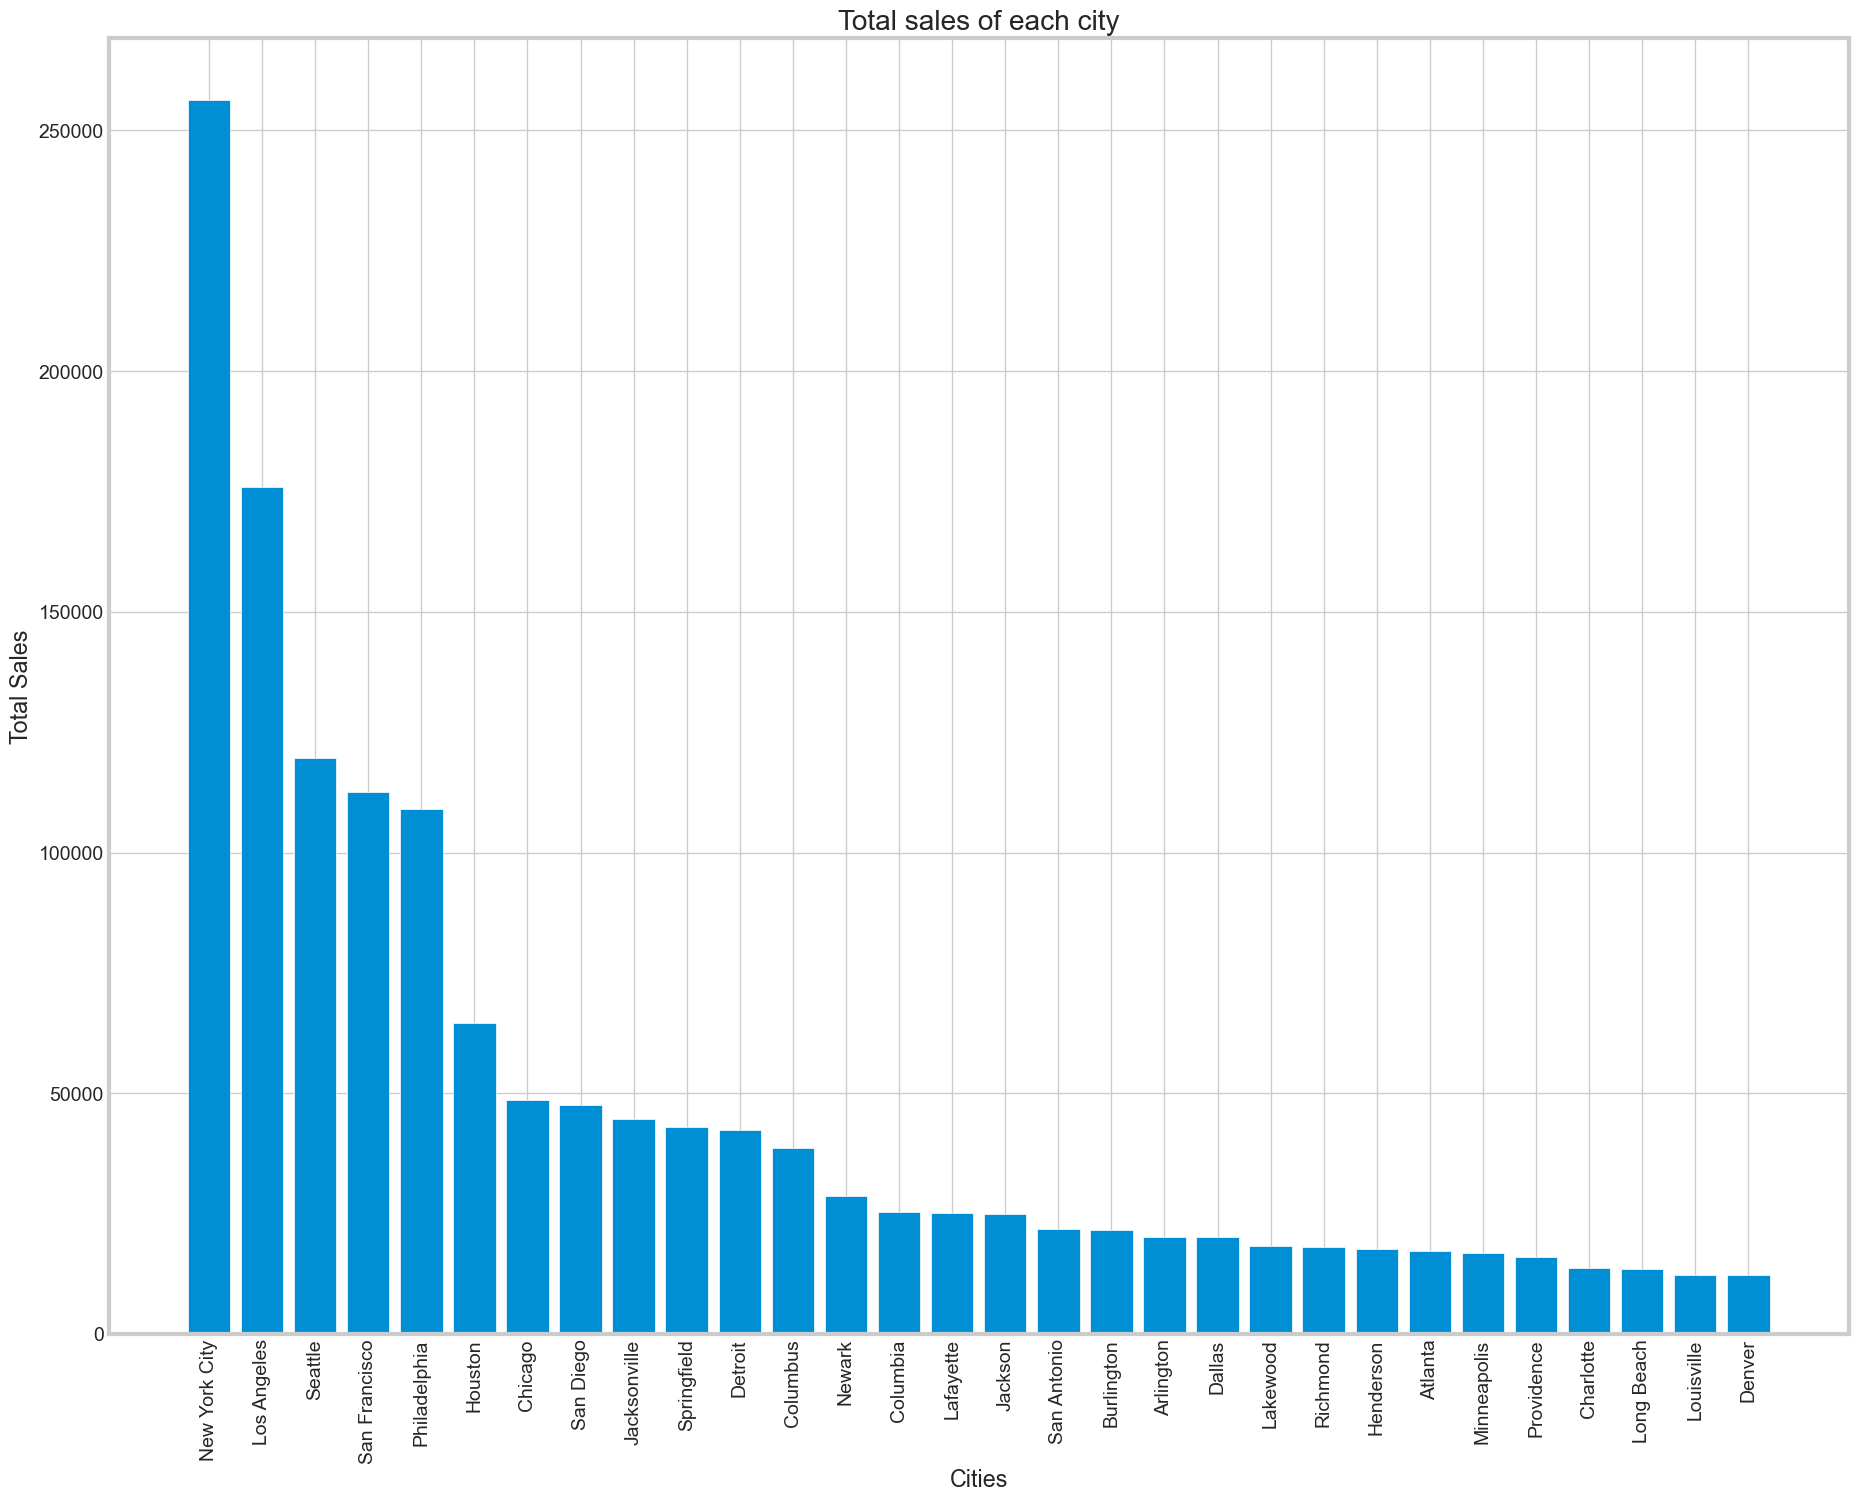

In [34]:
# City_sales distribution
City_sales = {}
city_sales =data[['City','Sales']]
for i in city_sales.City.unique():
    City_sales[i] = [data['Sales'][v] for v in data[data["City"] == i].index]

Total_sales ={}
for key, value in City_sales.items():
    Total_sales[key] = sum(value)

sale_C = Total_sales.items()
Sorted_sales = sorted(sale_C, key=lambda x: x[1], reverse = True)
#There exist 531 cities taking a set of top 30 cities in sales
top_30_cities = Sorted_sales[0:30]

x = dict(top_30_cities).keys()
x_labels = (np.arange(0,30)+1)
y = dict(top_30_cities).values()

fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_ylabel('Total Sales')
ax.set_xlabel('Cities')
plt.xticks(rotation=90)

ax.set_title('Total sales of each city');

# The chart shows thats New York City recorded the highest sales over 250000 sales
# Only 6 cities out of 531 made sales over 50,000 thus majority of the cities made sales below 50000
# Newyork city has the highest total sales


In [35]:
# getting the numerical values from our data subset
Corr=data[['Sales','Quantity','Discount','Profit']]
Corr

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164
...,...,...,...,...
9989,25.2480,3,0.20,4.1028
9990,91.9600,2,0.00,15.6332
9991,258.5760,2,0.20,19.3932
9992,29.6000,4,0.00,13.3200


In [36]:
# get the correlation
corr_data=Corr.corr()
corr_data

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


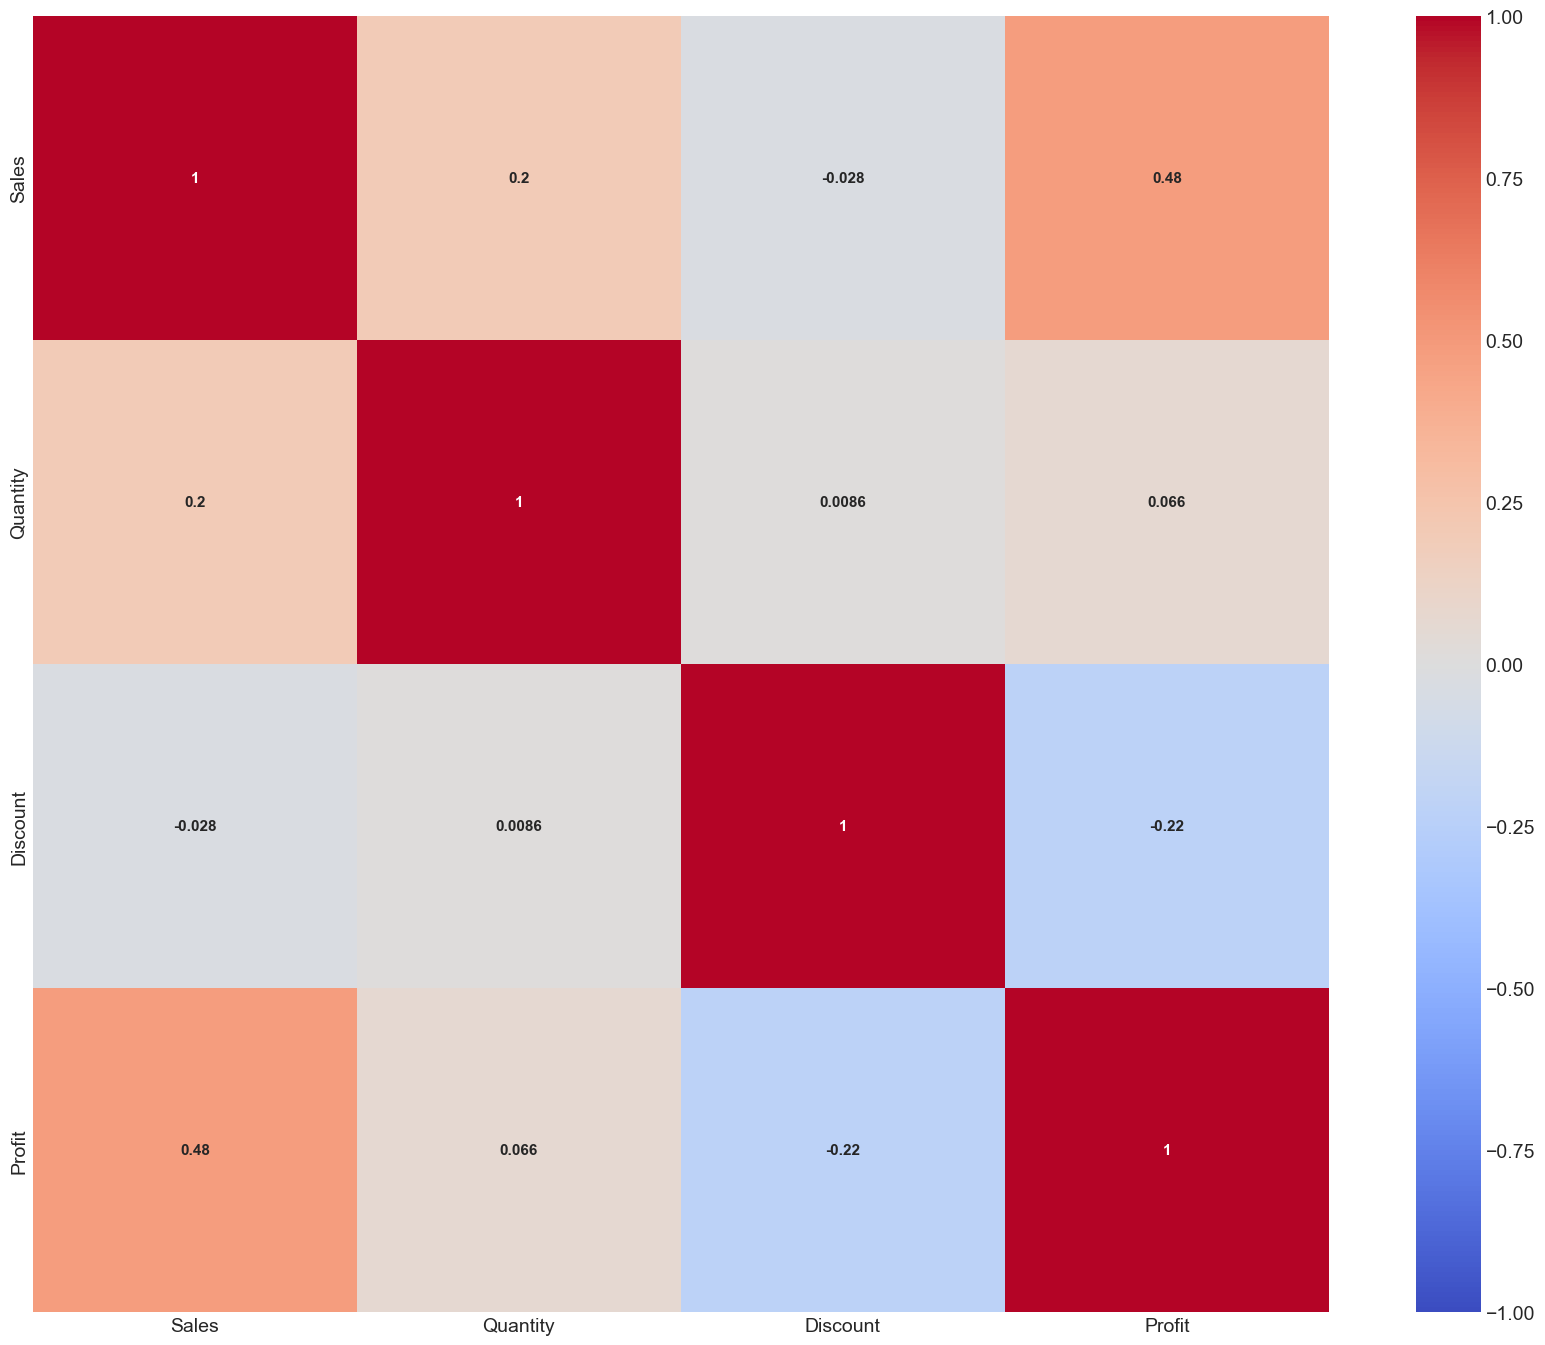

In [37]:
# sns.heatmap(Corr)
# also shows correlation
sns.heatmap(corr_data,cmap='coolwarm',vmin=-1,vmax=1,annot=True,square=True,
           annot_kws={'fontsize':11,'fontweight':'bold'})
plt.show()
# coolwarmRDBu
# profit has the highest positive correlation sales
# discount has the highest negative correlation sales

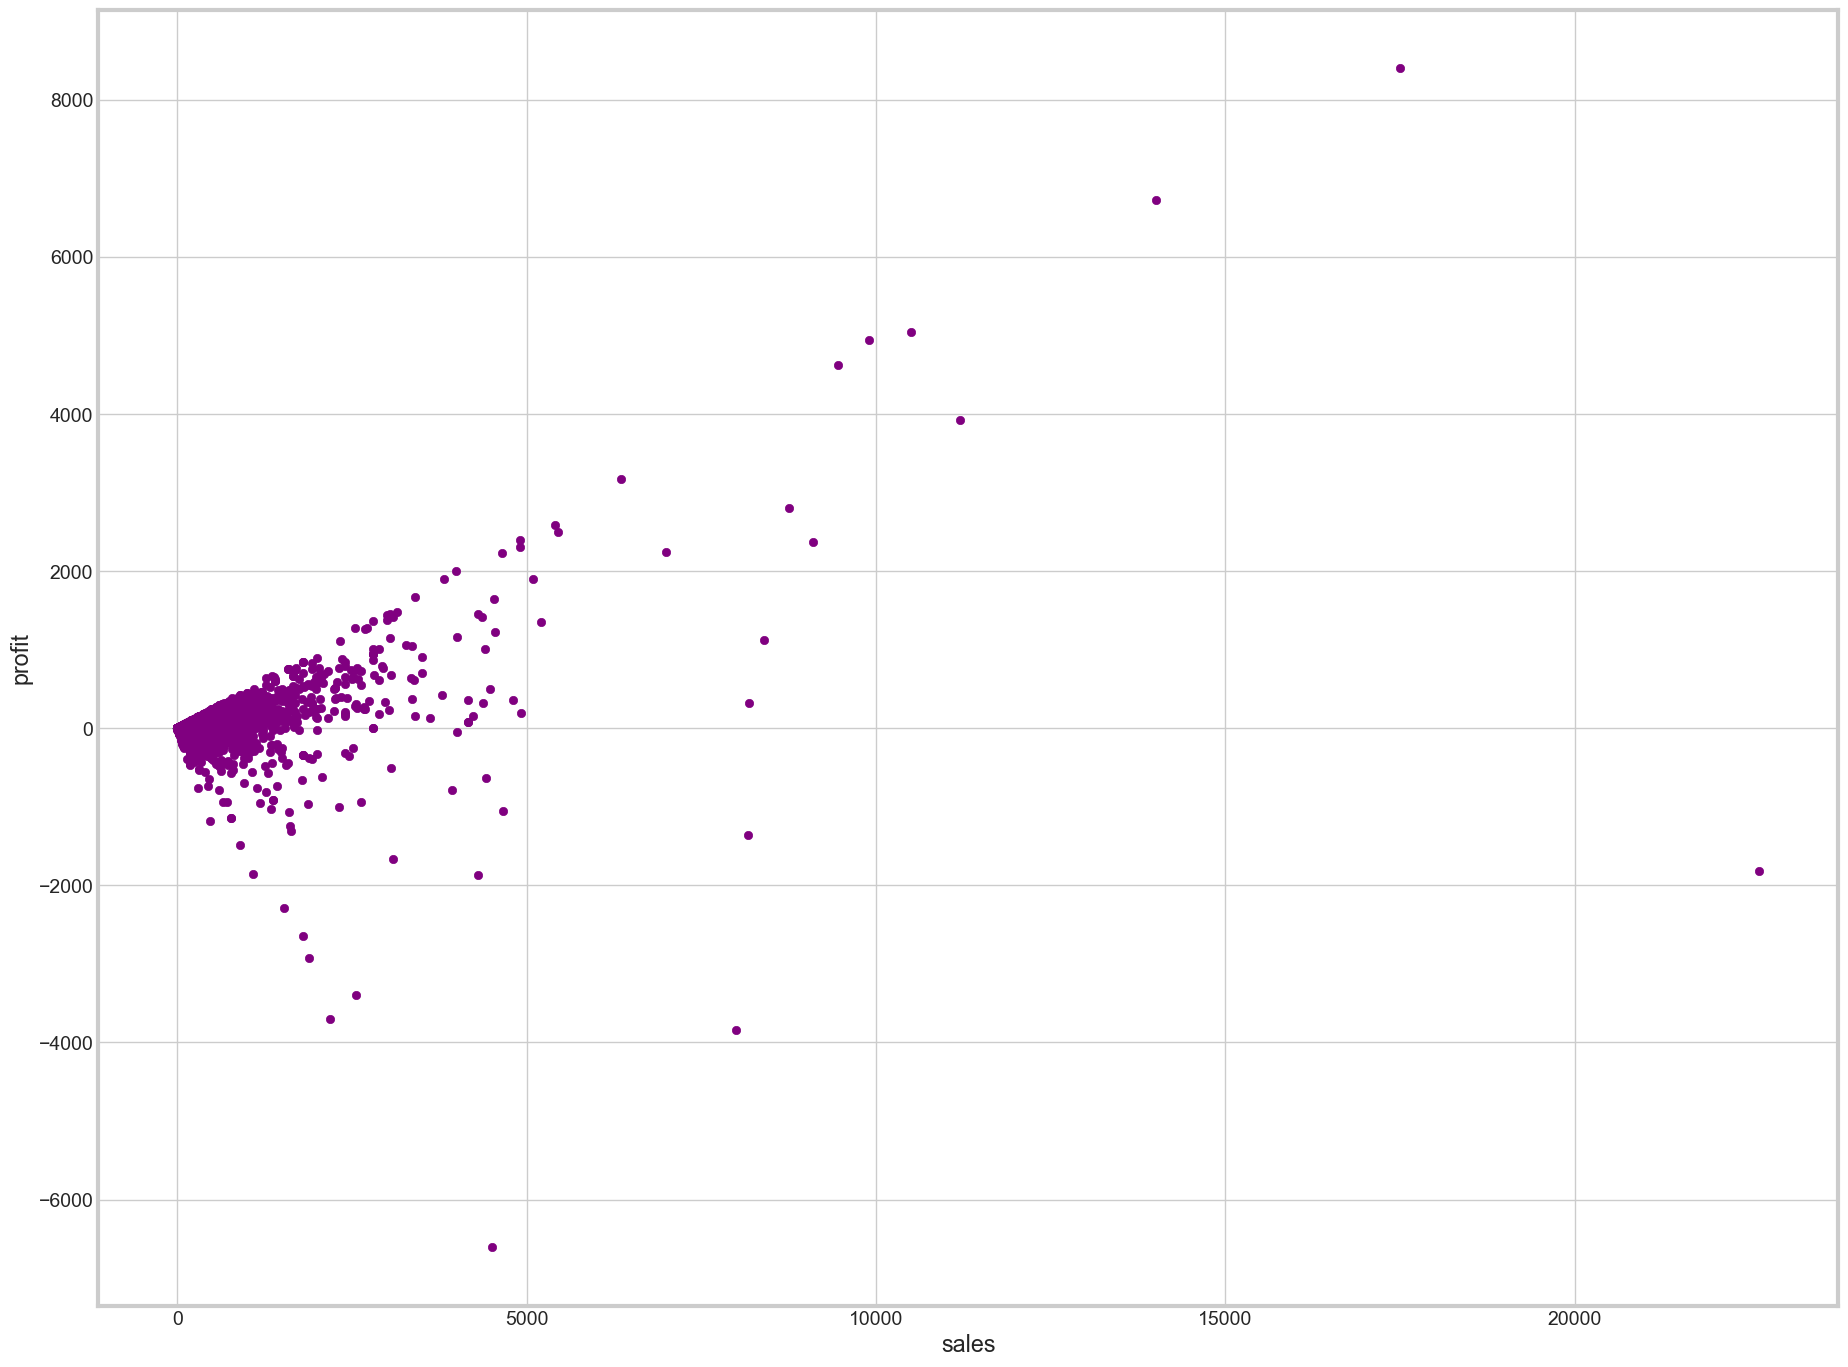

In [38]:
# the scatter plot
plt.scatter(x='Sales',y='Profit',data=data,color='purple')
plt.xlabel('sales')
plt.ylabel('profit')
plt.show()

Feature engineering


In [39]:
# Data clensing
# identifying missing values
data.isnull().sum()



Ship Mode    0
Segment      0
City         0
Sales        0
Quantity     0
Discount     0
Profit       0
dtype: int64

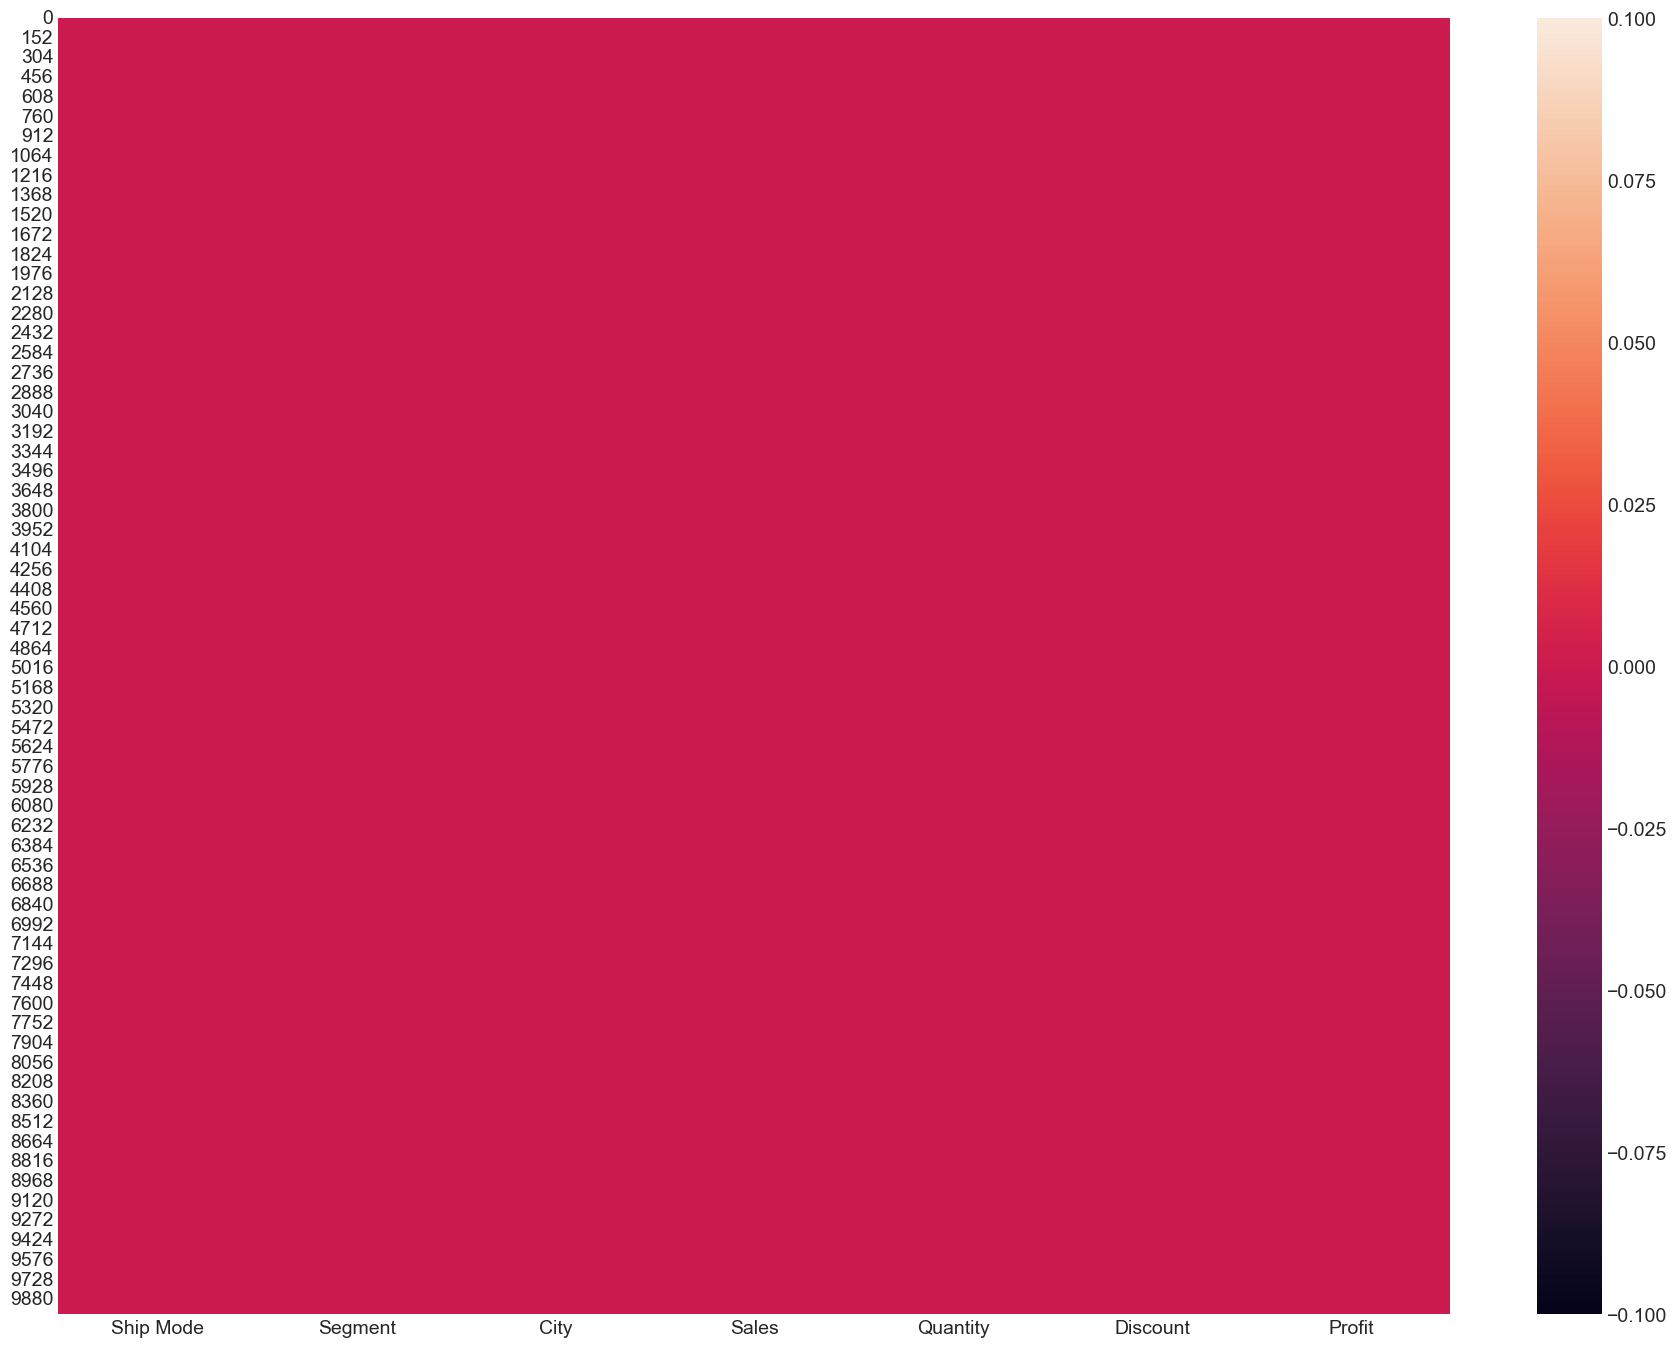

In [40]:
sns.heatmap(data.isnull())
plt.show()

In [49]:
data.dtypes

Ship Mode     object
Segment       object
City          object
Sales        float64
Quantity       int64
Discount     float64
Profit       float64
dtype: object

In [58]:
# any duplicated columns
data.columns.duplicated()


array([False, False, False, False, False, False, False])

In [66]:
# any duplicates in the rows
data.duplicated().sum()


50

In [68]:
# dropping duplicates in our columns
data=data.drop_duplicates()
data

,Ship Mode,Segment,City,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,29.6000,4,0.00,13.3200


In [69]:
data.duplicated().sum()

0

In [70]:
# finding IQR
percentile25 = data['Sales'].quantile(0.25)
percentile75 = data['Sales'].quantile(0.75)

# finding the upper and lower limits
upper_limit = percentile75 + 1.5 * percentile75
lower_limit = percentile25 - 1.5 * percentile25

# finding outliers
data[data['Sales'] > upper_limit]
data[data['Sales'] < lower_limit]



,Ship Mode,Segment,City,Sales,Quantity,Discount,Profit


In [71]:
# trimming outliers
new_df= data[(data['Sales'] < upper_limit)&(data['Sales']>lower_limit)]
new_df.shape


(8836, 7)

C:\Users\Hp\AppData\Local\Temp\ipykernel_10296\2977315611.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sales'])
C:\Users\Hp\AppData\Local\Temp\ipykernel_10296\2977315611.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Sales'])


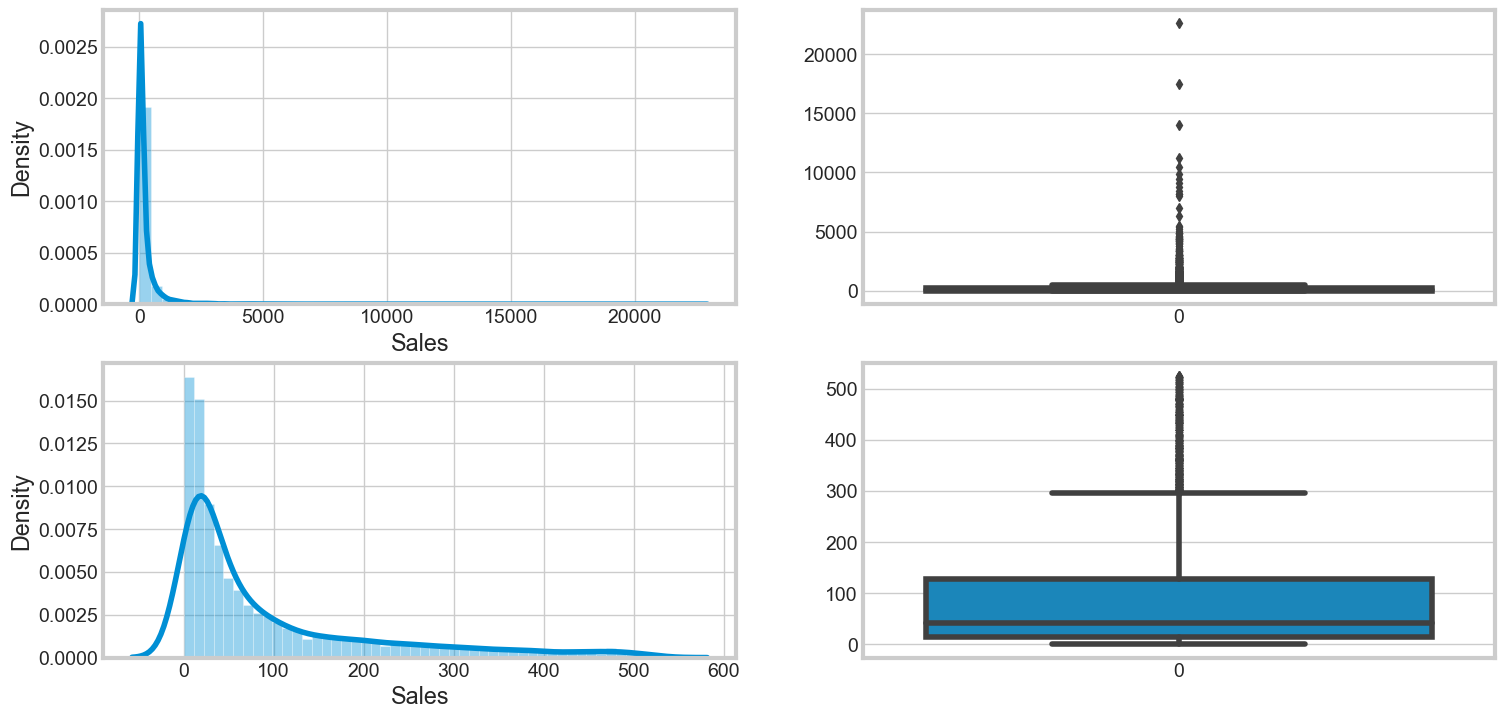

In [72]:
#  Compare the plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Sales'])
plt.subplot(2,2,2)
sns.boxplot(data['Sales'])
plt.subplot(2,2,3)
sns.distplot(new_df['Sales'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Sales'])
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_10296\3053098322.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Profit'])
C:\Users\Hp\AppData\Local\Temp\ipykernel_10296\3053098322.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Profit'])


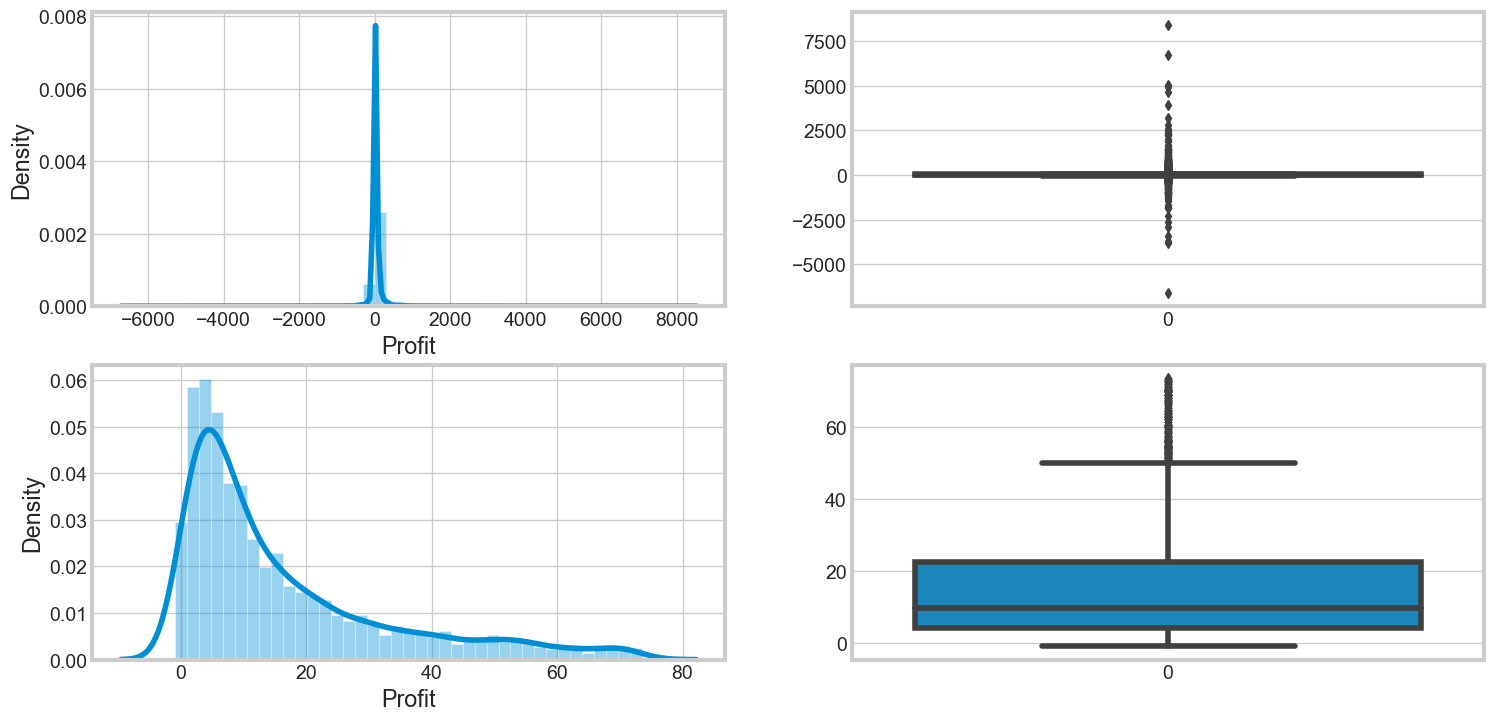

In [73]:
# finding IQR
percentile25 = data['Profit'].quantile(0.25)
percentile75 = data['Profit'].quantile(0.75)

# finding the upper and lower limits
upper_limit = percentile75 + 1.5 * percentile75
lower_limit = percentile25 - 1.5 * percentile25

# finding outliers
data[data['Profit'] > upper_limit]
data[data['Profit'] < lower_limit]

# trimming outliers
new_df= data[(data['Profit'] < upper_limit)&(data['Profit']>lower_limit)]
new_df.shape

#  Compare the plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Profit'])
plt.subplot(2,2,2)
sns.boxplot(data['Profit'])
plt.subplot(2,2,3)
sns.distplot(new_df['Profit'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Profit'])
plt.show()

In [74]:
new_df['Cost']=new_df['Sales']-(new_df['Profit'])
# new_df
new_df


C:\Users\Hp\AppData\Local\Temp\ipykernel_10296\3040154072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Cost']=new_df['Sales']-(new_df['Profit'])


,Ship Mode,Segment,City,Sales,Quantity,Discount,Profit,Cost
0,Second Class,Consumer,Henderson,261.960,2,0.0,41.9136,220.0464
2,Second Class,Corporate,Los Angeles,14.620,2,0.0,6.8714,7.7486
4,Standard Class,Consumer,Fort Lauderdale,22.368,2,0.2,2.5164,19.8516
5,Standard Class,Consumer,Los Angeles,48.860,7,0.0,14.1694,34.6906
6,Standard Class,Consumer,Los Angeles,7.280,4,0.0,1.9656,5.3144
...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,25.248,3,0.2,4.1028,21.1452
9990,Standard Class,Consumer,Costa Mesa,91.960,2,0.0,15.6332,76.3268
9991,Standard Class,Consumer,Costa Mesa,258.576,2,0.2,19.3932,239.1828
9992,Standard Class,Consumer,Costa Mesa,29.600,4,0.0,13.3200,16.2800


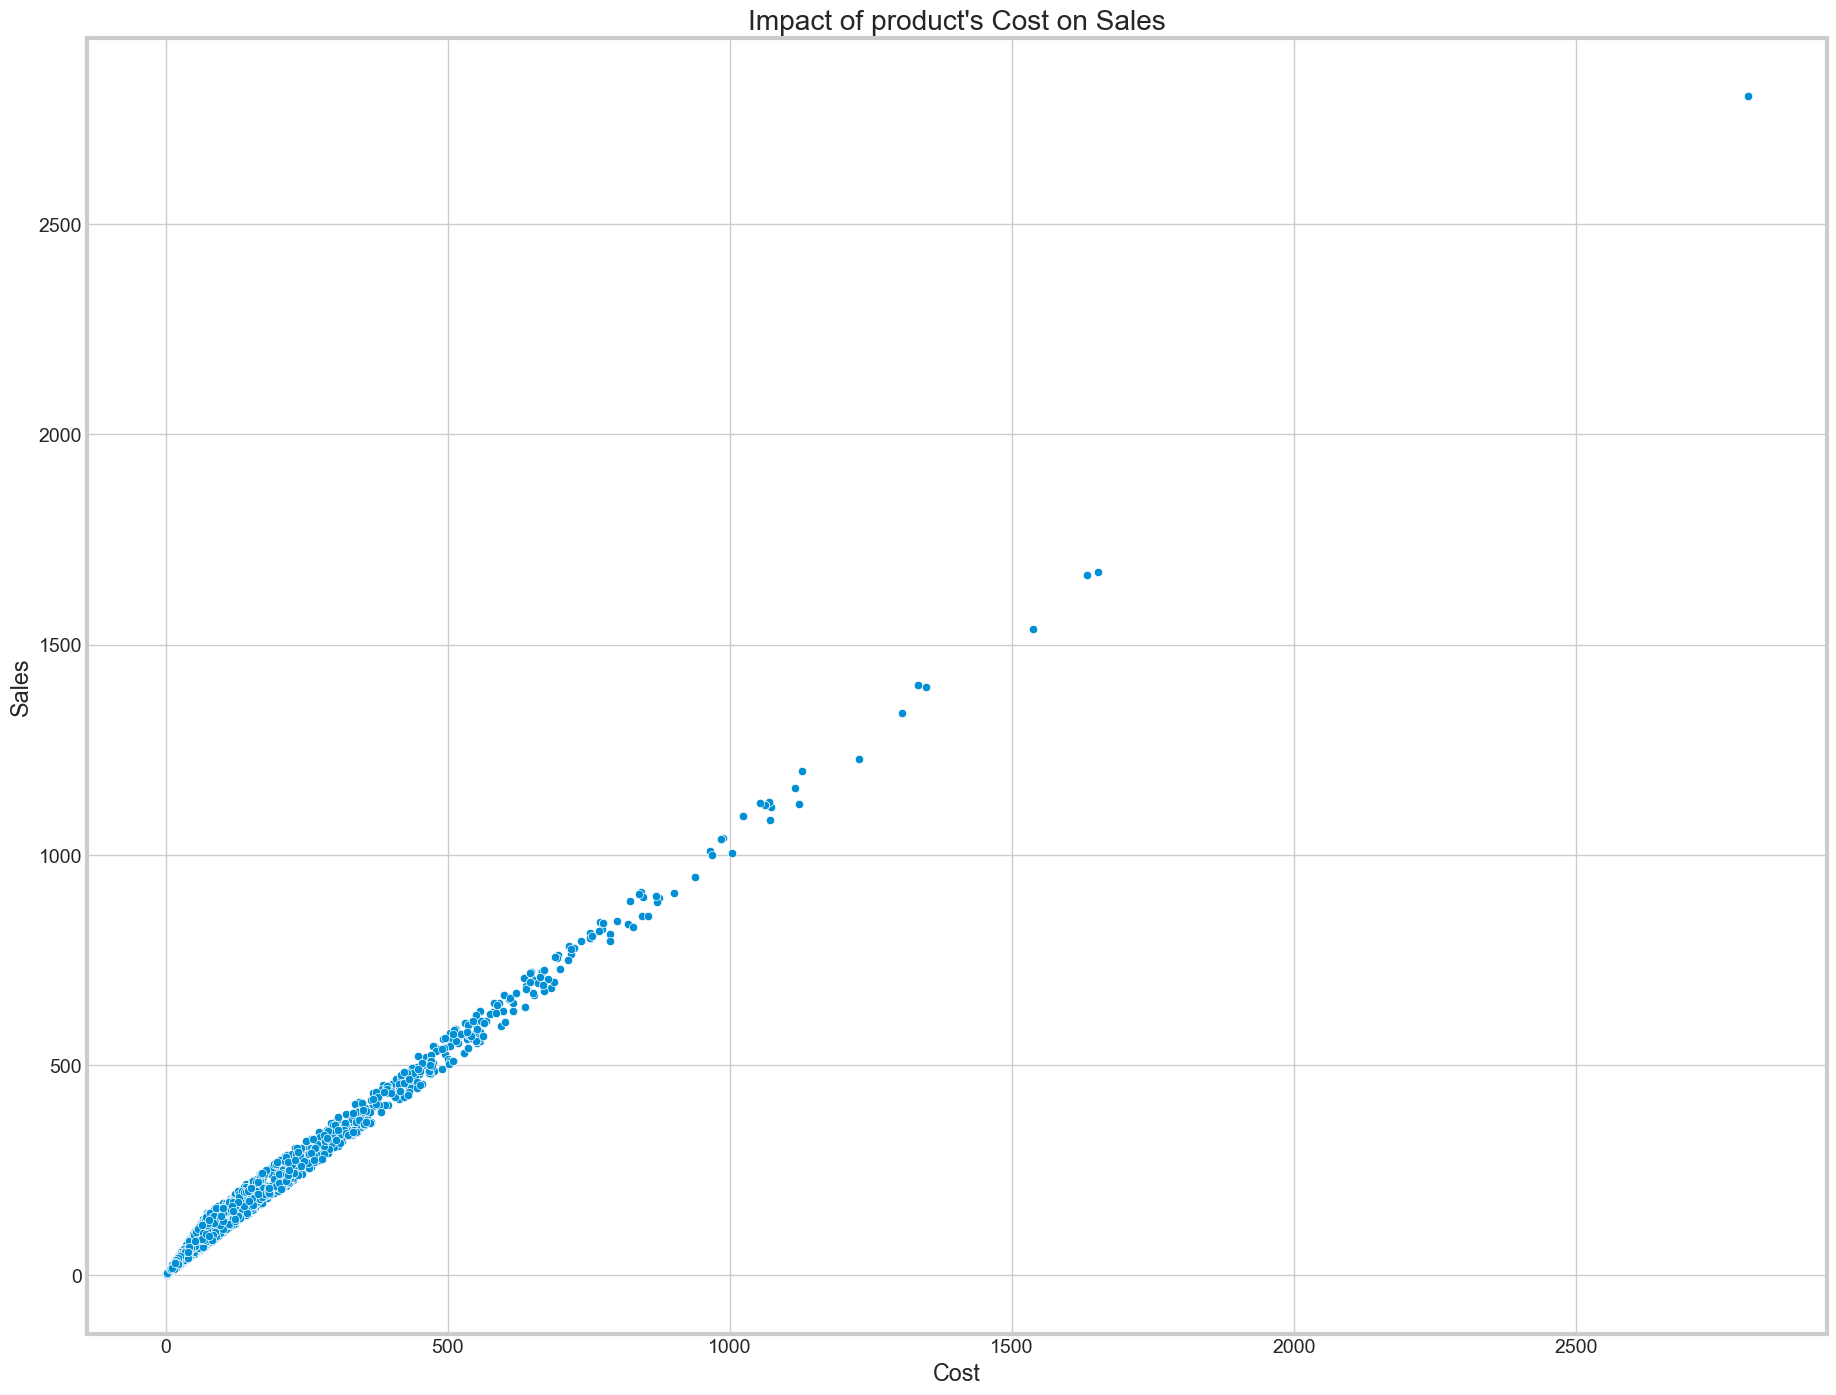

In [75]:
Cost_sales = sns.scatterplot(x='Cost',y='Sales',data=new_df)
Cost_sales.set(title="Impact of product's Cost on Sales");
# cost has ahigh correlation to Sales

In [76]:
a=new_df['Sales'].corr(new_df['Quantity'])
a

0.1663150685027902